<a href="https://colab.research.google.com/github/Mrunal018/Principle-Component-Analysis/blob/main/EURUSD(Volume).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Internship/Copy of EURUSD_05.05.2003-30.06.2021(1).csv')

In [ ]:
data.head(10)

,Local time,open,high,low,close,volume
0,05.05.2003 00:00:00.000 GMT+0300,1.12354,1.13019,1.12030,1.12804,1053162.797
1,06.05.2003 00:00:00.000 GMT+0300,1.12798,1.14510,1.12738,1.14368,1061122.699
2,07.05.2003 00:00:00.000 GMT+0300,1.14367,1.14448,1.13275,1.13677,1056796.590
3,08.05.2003 00:00:00.000 GMT+0300,1.13675,1.15092,1.13026,1.15026,1058908.699
4,09.05.2003 00:00:00.000 GMT+0300,1.15002,1.15376,1.14362,1.14907,1063989.000
5,10.05.2003 00:00:00.000 GMT+0300,1.14907,1.14907,1.14907,1.14907,0.000
6,11.05.2003 00:00:00.000 GMT+0300,1.14907,1.14907,1.14907,1.14907,0.000
7,12.05.2003 00:00:00.000 GMT+0300,1.14958,1.16244,1.14946,1.15457,1056515.797
8,13.05.2003 00:00:00.000 GMT+0300,1.15427,1.15751,1.14630,1.15150,1057731.395
9,14.05.2003 00:00:00.000 GMT+0300,1.15190,1.15388,1.14681,1.14970,1053901.311


In [ ]:
data=data[data['volume']!=0] #discard volume zero data points
data.reset_index(drop=True, inplace=True)
data.isna().sum()
data.tail() # printing tail just to check how many rows are present

,Local time,open,high,low,close,volume
4729,24.06.2021 00:00:00.000 GMT+0300,1.19267,1.19565,1.19178,1.19322,85152.21000
4730,25.06.2021 00:00:00.000 GMT+0300,1.19322,1.19754,1.19264,1.19392,77837.64500
4731,28.06.2021 00:00:00.000 GMT+0300,1.19380,1.19447,1.19025,1.19260,85154.26000
4732,29.06.2021 00:00:00.000 GMT+0300,1.19297,1.19334,1.18779,1.18973,98898.57000
4733,30.06.2021 00:00:00.000 GMT+0300,1.18973,1.19092,1.18452,1.18589,4301.30191


In [ ]:
# Reset the index to bring back the 'time' column
data = data.reset_index()
# Now set the 'time' column as the index
data = data.set_index(['Local time'])
data.head()

,index,open,high,low,close,volume
Local time,,,,,,
05.05.2003 00:00:00.000 GMT+0300,0,1.12354,1.13019,1.12030,1.12804,1053162.797
06.05.2003 00:00:00.000 GMT+0300,1,1.12798,1.14510,1.12738,1.14368,1061122.699
07.05.2003 00:00:00.000 GMT+0300,2,1.14367,1.14448,1.13275,1.13677,1056796.590
08.05.2003 00:00:00.000 GMT+0300,3,1.13675,1.15092,1.13026,1.15026,1058908.699
09.05.2003 00:00:00.000 GMT+0300,4,1.15002,1.15376,1.14362,1.14907,1063989.000


# **Plotting Time Series**

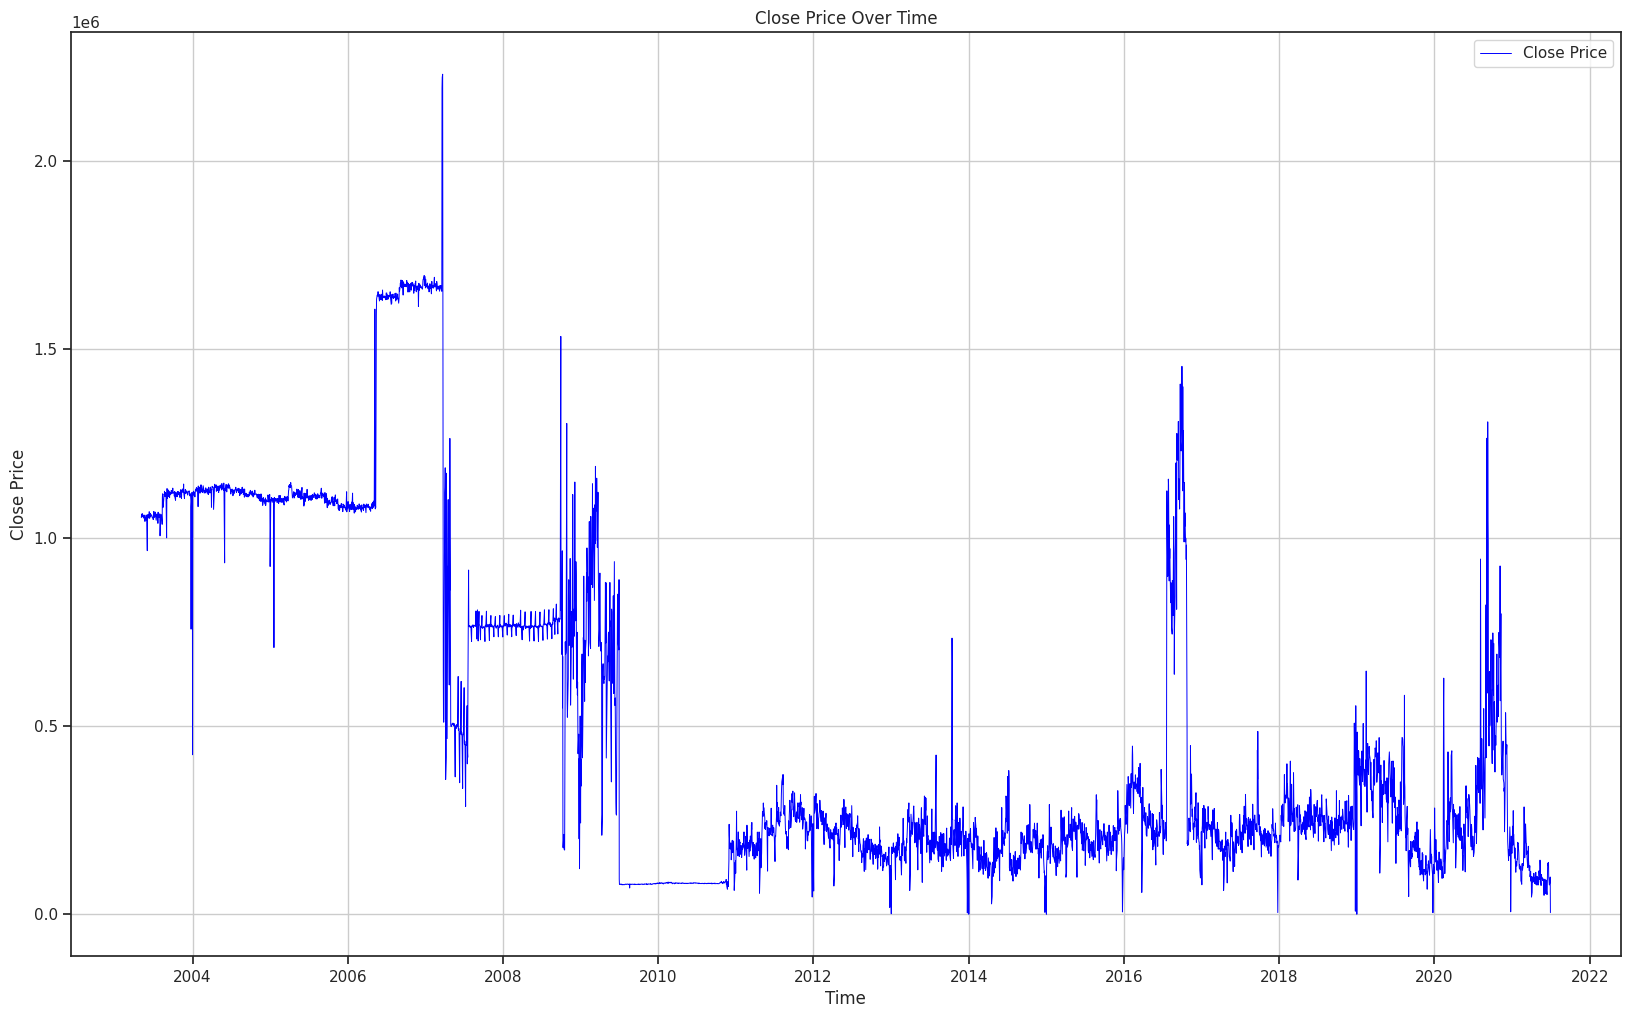

In [ ]:
# Convert the index to a datetime object
data.index = pd.to_datetime(data.index, format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Set utc=True to handle timezone-aware datetimes

# Plot
plt.figure(figsize=(20, 12))
plt.plot(data.index, data['volume'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# **Seasonal decomposition : monthly and dayily**

plot shows Daily seasonality present i.e. after 7 days the pattern is recurring.

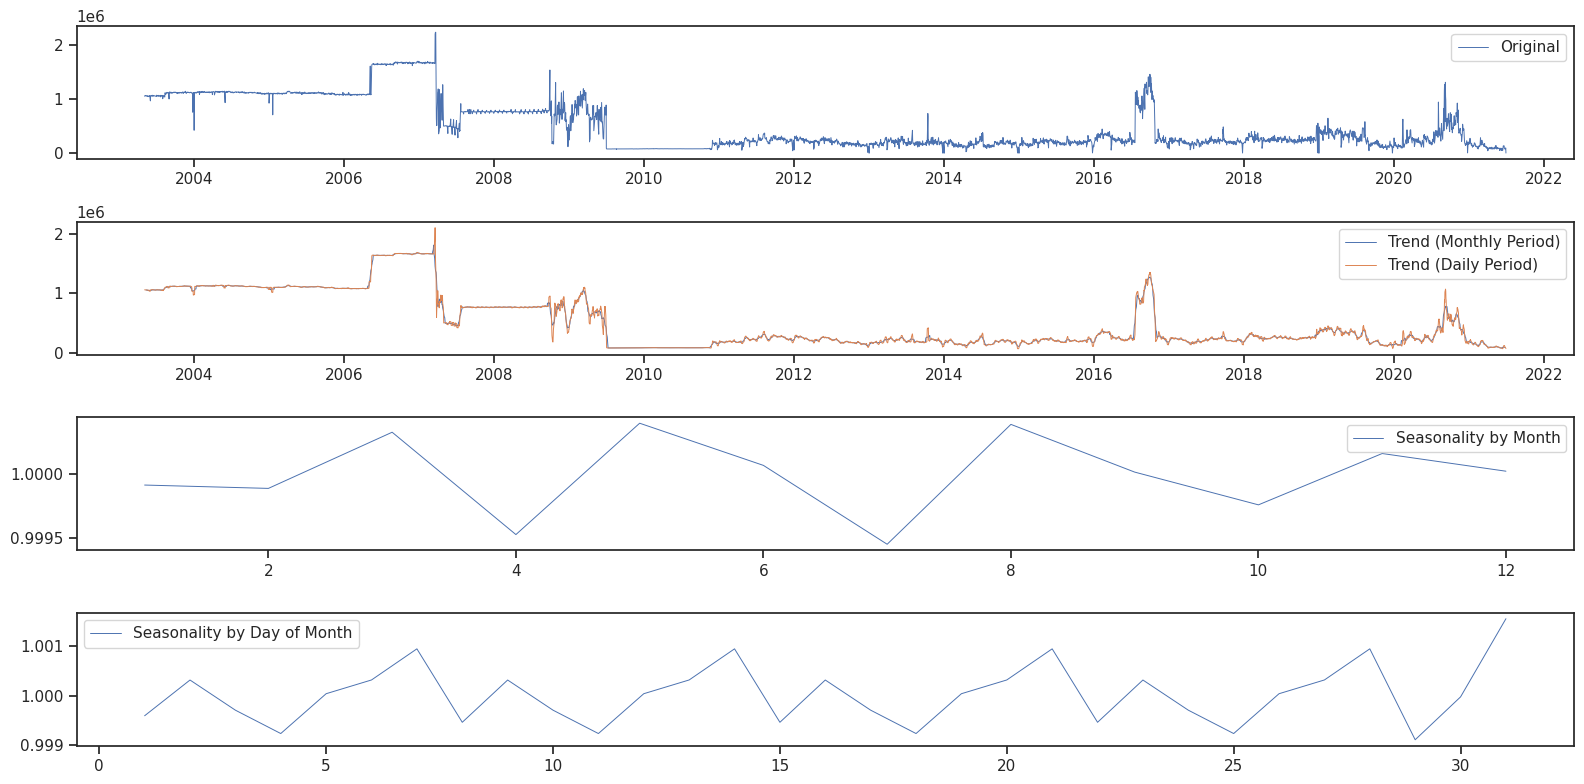

In [ ]:
# Seasonal decomposition
result_monthly = seasonal_decompose(data['volume'], model='multiplicative', period=15)  # Monthly period
result_daily = seasonal_decompose(data['volume'], model='multiplicative', period=5)  # Daily period

# Plot the results
plt.figure(figsize=(16, 8))

# Plot original data
plt.subplot(411)
plt.plot(data['volume'], label='Original')  # Plot the 'close' column
plt.legend(loc='best')

# Plot trend component
plt.subplot(412)
plt.plot(result_monthly.trend, label='Trend (Monthly Period)')
plt.plot(result_daily.trend, label='Trend (Daily Period)')
plt.legend(loc='best')

# Plot seasonal component by months
seasonal_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
plt.subplot(413)
plt.plot(seasonal_monthly, label='Seasonality by Month')
plt.legend(loc='best')

# Plot seasonal component by days of the month
seasonal_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()
plt.subplot(414)
plt.plot(seasonal_daily, label='Seasonality by Day of Month')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# **Stationary Window Highlited**

We can observe the Stationary window between year 2012 and 2014

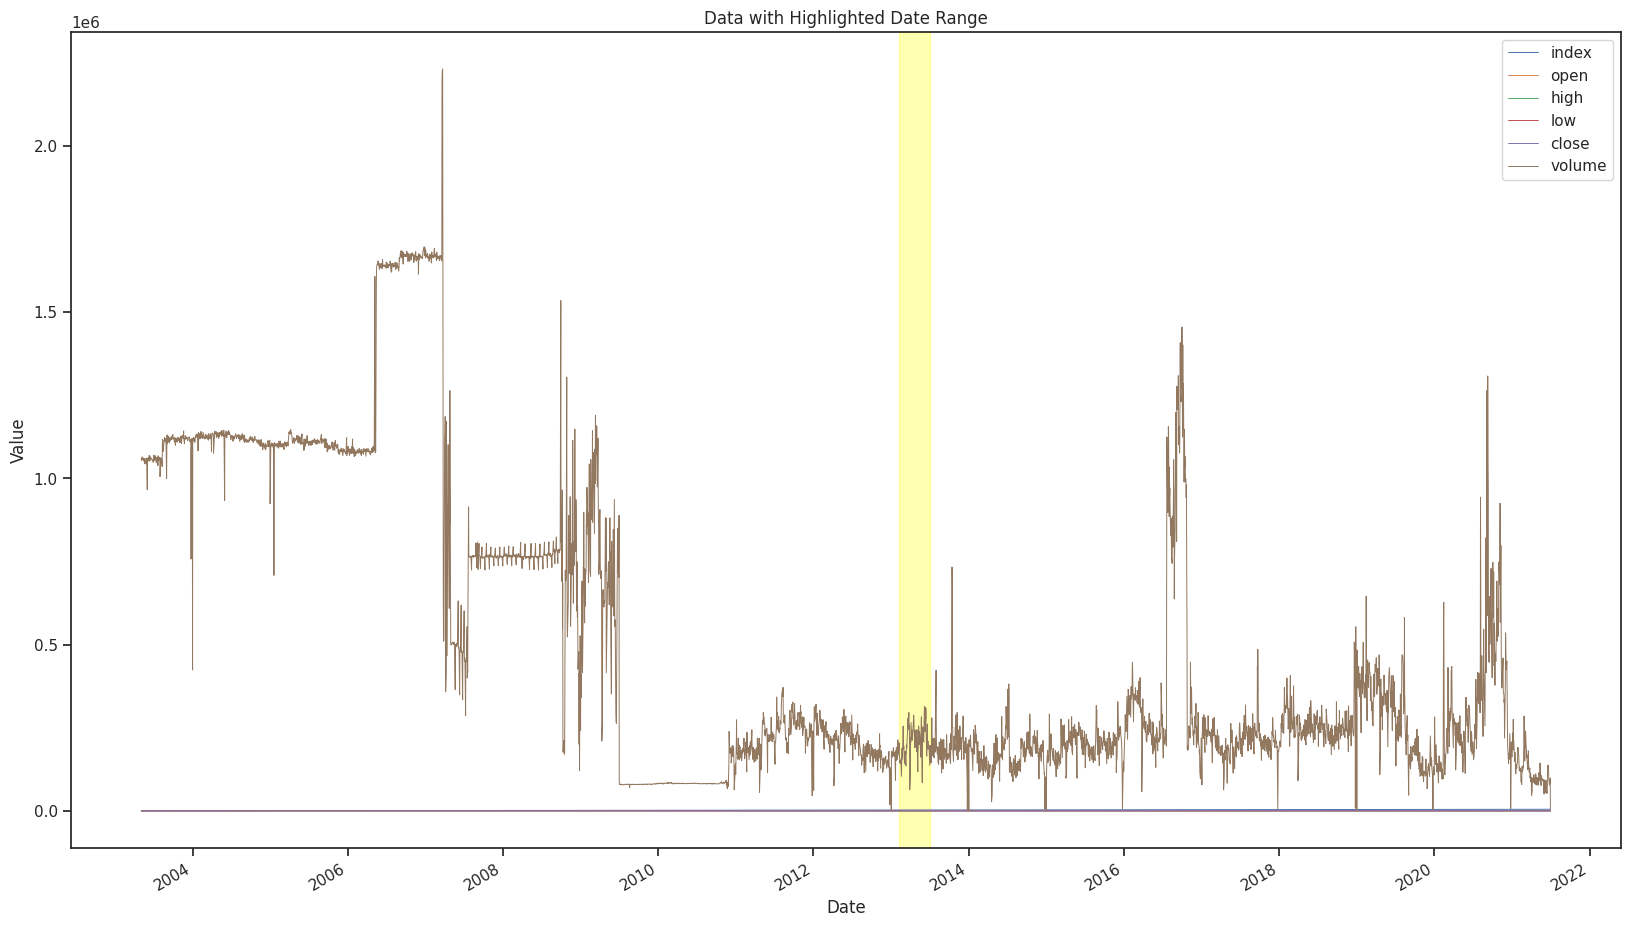

In [ ]:
import matplotlib.pyplot as plt

# Define the start and end date for the highlight
start_date = '2013-02-05'
end_date = '2013-06-30'

# Create a plot
fig, ax = plt.subplots(figsize=(20, 12))

# Plot the data
data.plot(ax=ax)

# Highlight the date range
ax.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)

# Customize plot
plt.title('Data with Highlighted Date Range')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
data.describe()

,index,open,high,low,close,volume
count,4734.000000,4734.000000,4734.000000,4734.000000,4734.000000,4.734000e+03
mean,2366.500000,1.255723,1.261070,1.250208,1.255760,5.052799e+05
std,1366.732417,0.120047,0.120823,0.119110,0.120018,4.502866e+05
min,0.000000,1.038960,1.041820,1.034050,1.038980,1.500000e+00
25%,1183.250000,1.150038,1.154622,1.145112,1.150192,1.810935e+05
50%,2366.500000,1.247380,1.253155,1.240865,1.247120,2.557216e+05
75%,3549.750000,1.340537,1.345515,1.334910,1.340475,8.036936e+05
max,4733.000000,1.599500,1.604030,1.586560,1.599120,2.230654e+06


# **Stationary window Dataset**

                           index     open     high      low    close  \
Local time                                                             
2013-02-05 22:00:00+00:00   2547  1.35840  1.35968  1.34958  1.35234   
2013-02-06 22:00:00+00:00   2548  1.35236  1.35775  1.33709  1.33977   
2013-02-07 22:00:00+00:00   2549  1.33979  1.34294  1.33540  1.33665   
2013-02-10 22:00:00+00:00   2550  1.33687  1.34280  1.33575  1.34064   
2013-02-11 22:00:00+00:00   2551  1.34064  1.34766  1.33645  1.34542   
...                          ...      ...      ...      ...      ...   
2013-06-23 21:00:00+00:00   2645  1.30919  1.31441  1.30595  1.31206   
2013-06-24 21:00:00+00:00   2646  1.31208  1.31514  1.30653  1.30815   
2013-06-25 21:00:00+00:00   2647  1.30815  1.30875  1.29850  1.30126   
2013-06-26 21:00:00+00:00   2648  1.30126  1.30553  1.30004  1.30390   
2013-06-27 21:00:00+00:00   2649  1.30390  1.31036  1.29915  1.30099   

                                volume  
Local time            

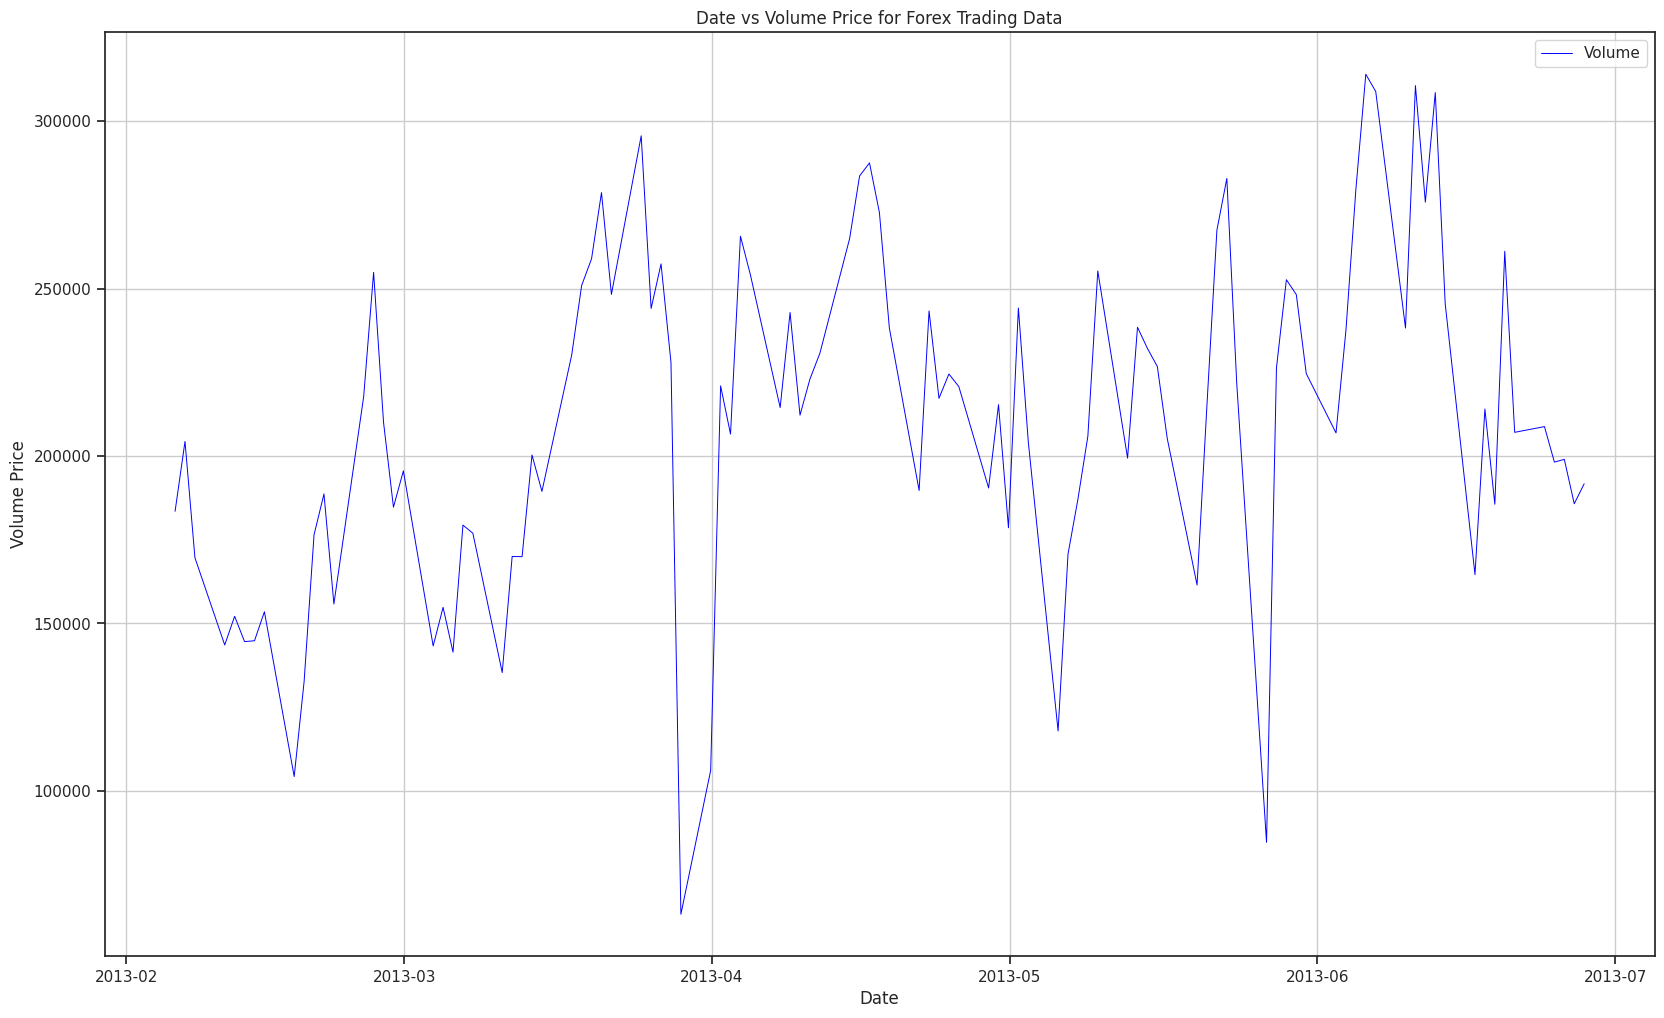

In [ ]:
start_date = pd.to_datetime('2013-02-05').tz_localize('UTC') # Make tz-aware
end_date = pd.to_datetime('2013-06-30').tz_localize('UTC') # Make tz-aware

# Now filter the DataFrame
data2 = data[(data.index >= start_date) & (data.index <= end_date)]
print(data2)

plt.figure(figsize=(20, 12))
plt.plot(data2.index, data2['volume'], label='Volume', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.title('Date vs Volume Price for Forex Trading Data')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**ADF Test**

In [ ]:
print(data2)
result = adfuller(data2['close'])
p_value = result[1]
print(result)
print("Test Statistic:", result[0])
print("P-value:", result[1])
print("Number of Lags:", result[2])
print("Number of Observations:", result[3])
print("Critical Values:", result[4])
if p_value < 0.05:
    print("Reject the null hypothesis. The data2 is stationary.")
else:
    print("Fail to reject the null hypothesis. The data2 is non-stationary.")


                           index     open     high      low    close  \
Local time                                                             
2013-02-05 22:00:00+00:00   2547  1.35840  1.35968  1.34958  1.35234   
2013-02-06 22:00:00+00:00   2548  1.35236  1.35775  1.33709  1.33977   
2013-02-07 22:00:00+00:00   2549  1.33979  1.34294  1.33540  1.33665   
2013-02-10 22:00:00+00:00   2550  1.33687  1.34280  1.33575  1.34064   
2013-02-11 22:00:00+00:00   2551  1.34064  1.34766  1.33645  1.34542   
...                          ...      ...      ...      ...      ...   
2013-06-23 21:00:00+00:00   2645  1.30919  1.31441  1.30595  1.31206   
2013-06-24 21:00:00+00:00   2646  1.31208  1.31514  1.30653  1.30815   
2013-06-25 21:00:00+00:00   2647  1.30815  1.30875  1.29850  1.30126   
2013-06-26 21:00:00+00:00   2648  1.30126  1.30553  1.30004  1.30390   
2013-06-27 21:00:00+00:00   2649  1.30390  1.31036  1.29915  1.30099   

                                volume  
Local time            

**Seasonality**

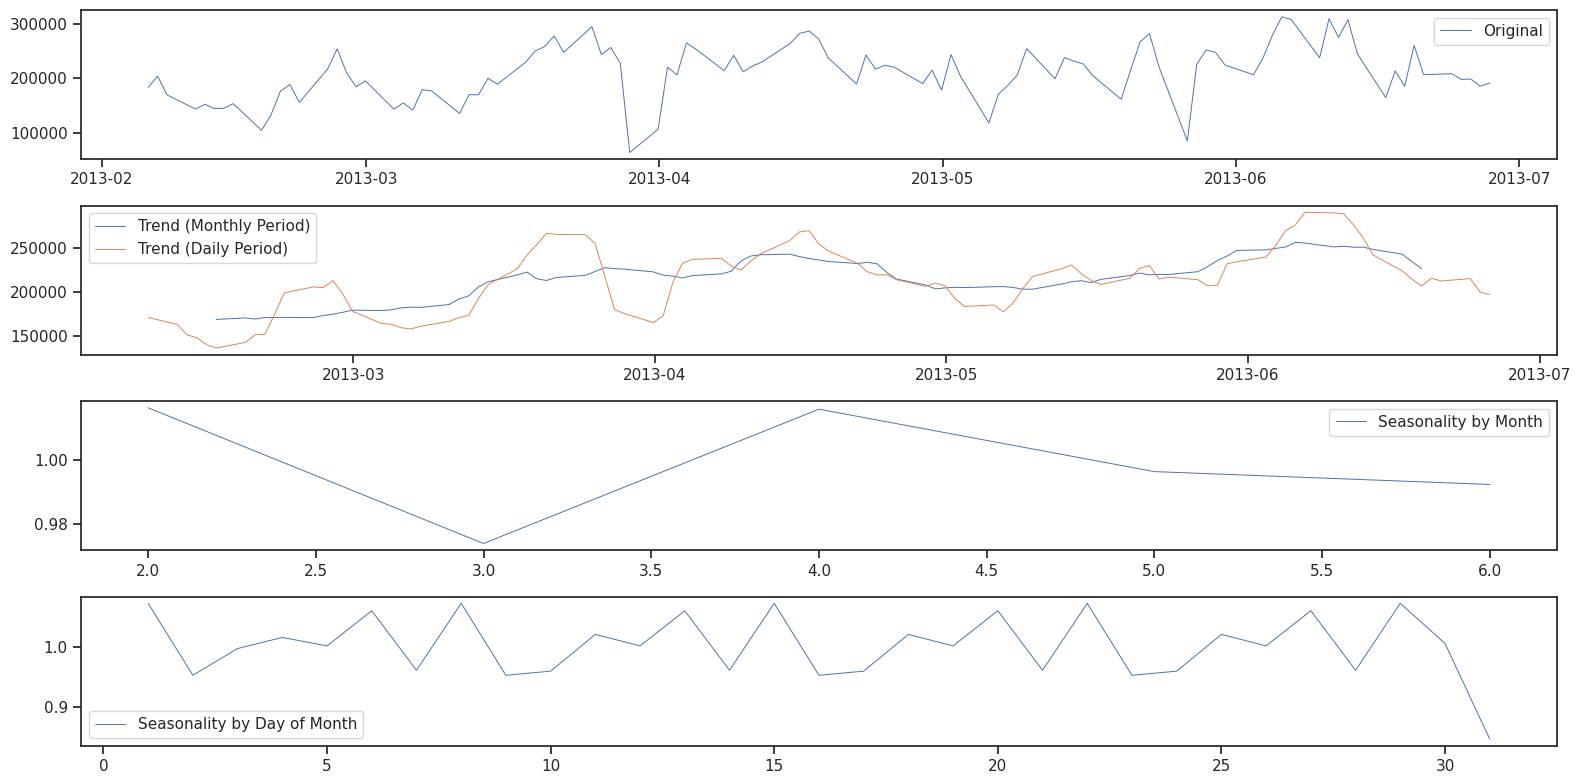

In [ ]:
# Seasonal decomposition
result_monthly = seasonal_decompose(data2['volume'], model='multiplicative', period=15)  # Monthly period
result_daily = seasonal_decompose(data2['volume'], model='multiplicative', period=5)  # Daily period

# Plot the results
plt.figure(figsize=(16, 8))

# Plot original data2
plt.subplot(411)
plt.plot(data2['volume'], label='Original')  # Plot the 'close' column
plt.legend(loc='best')

# Plot trend component
plt.subplot(412)
plt.plot(result_monthly.trend, label='Trend (Monthly Period)')
plt.plot(result_daily.trend, label='Trend (Daily Period)')
plt.legend(loc='best')

# Plot seasonal component by months
seasonal_monthly = result_monthly.seasonal.groupby(result_monthly.seasonal.index.month).mean()
plt.subplot(413)
plt.plot(seasonal_monthly, label='Seasonality by Month')
plt.legend(loc='best')

# Plot seasonal component by days of the month
seasonal_daily = result_daily.seasonal.groupby(result_daily.seasonal.index.day).mean()
plt.subplot(414)
plt.plot(seasonal_daily, label='Seasonality by Day of Month')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Stationarity using local, global mean and variability**

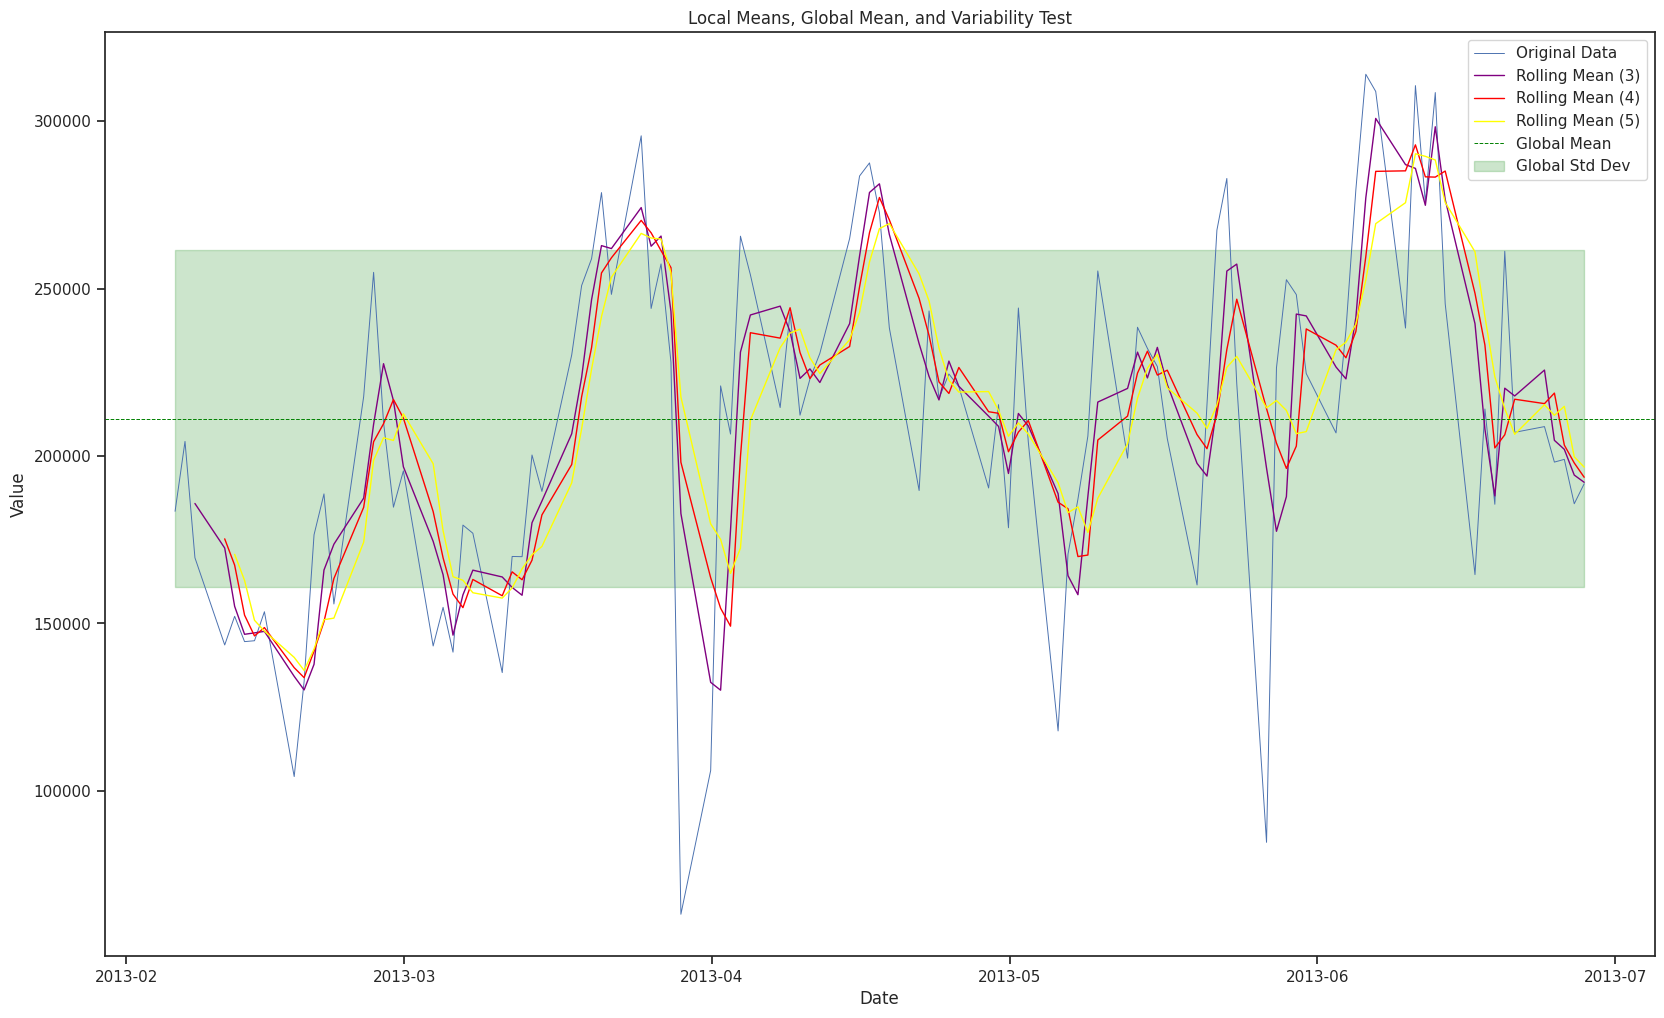

In [ ]:
# Adjusted rolling window sizes
rolling_windows = [3, 4, 5]
colors = ['purple', 'red', 'yellow']

# Plotting local means for different rolling window sizes
plt.figure(figsize=(20, 12))
plt.plot(data2.index, data2['volume'], label='Original Data')

for i, window in enumerate(rolling_windows):
    rolling_mean = data2['volume'].rolling(window=window).mean()
    plt.plot(rolling_mean, label=f'Rolling Mean ({window})', linewidth=1, color=colors[i])

global_mean = data2['volume'].mean()
global_std = data2['volume'].std()
plt.axhline(global_mean, color='green', linestyle='--', label='Global Mean')
plt.fill_between(data2.index, global_mean - global_std, global_mean + global_std, color='green', alpha=0.2, label='Global Std Dev')

plt.title('Local Means, Global Mean, and Variability Test')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# **Comparison between additive and multiplicative model**

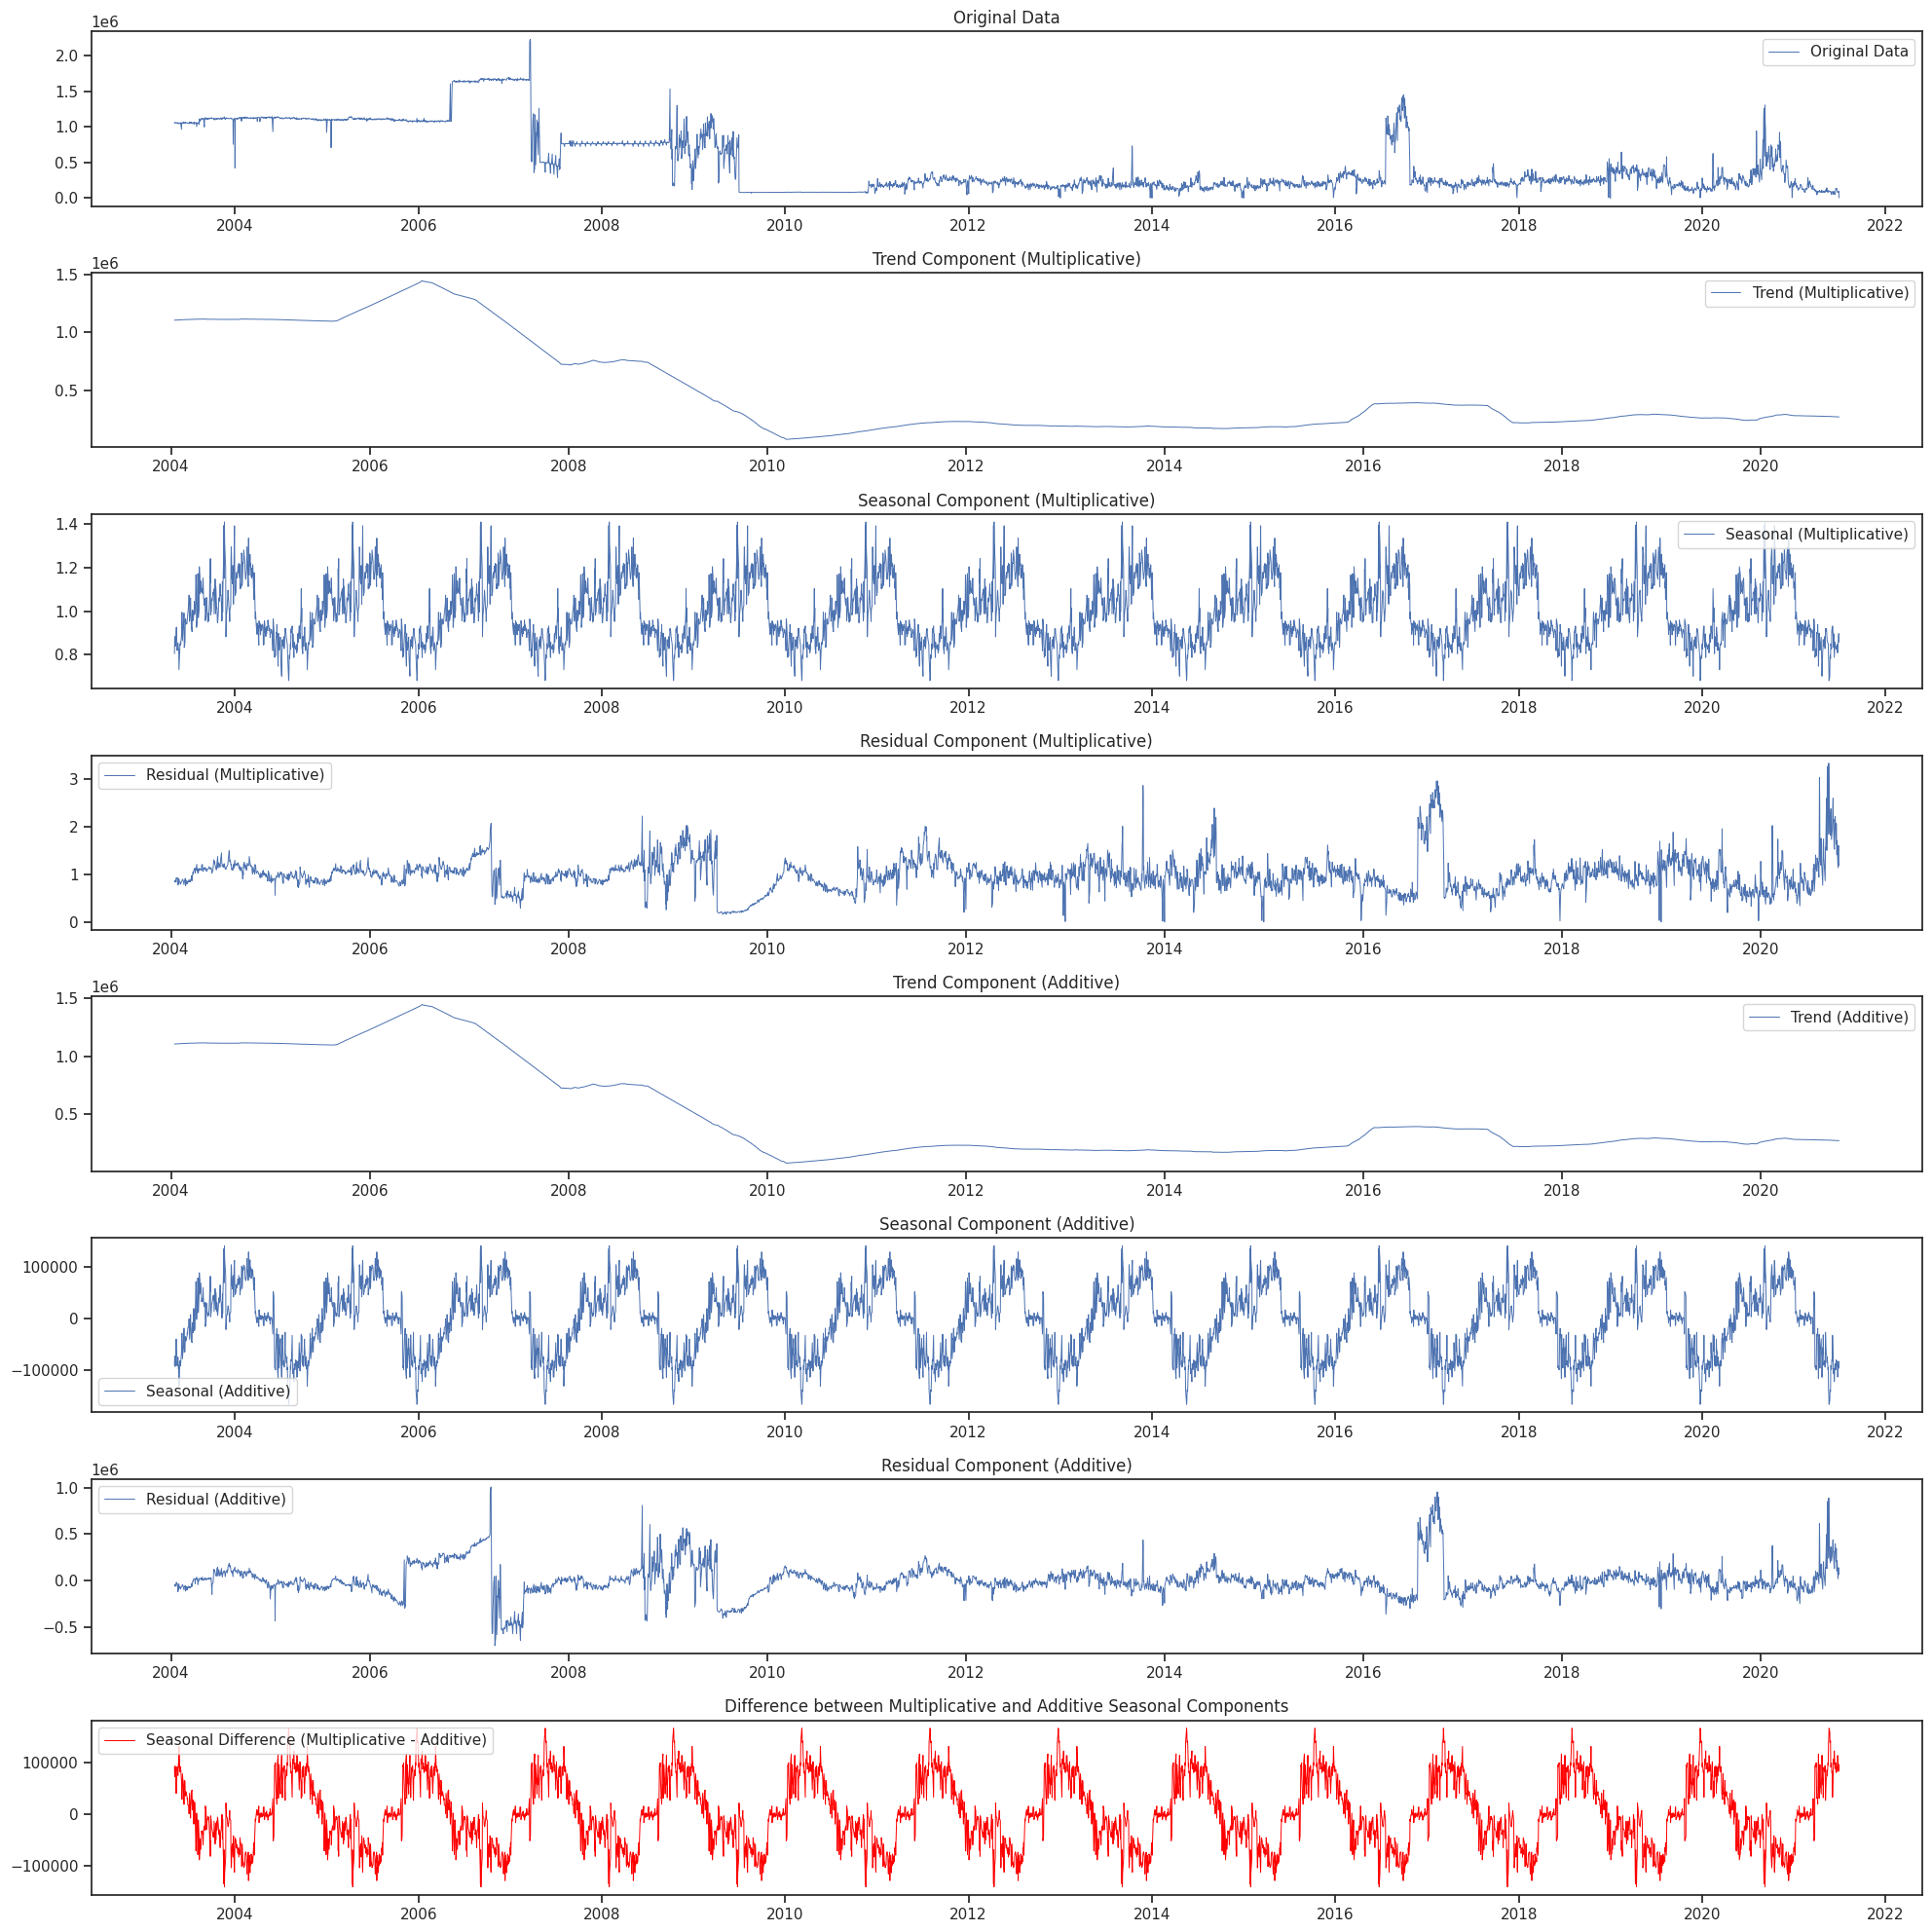

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using multiplicative model
result_multiplicative = seasonal_decompose(data['volume'], model='multiplicative', period=365)

# Perform seasonal decomposition using additive model
result_additive = seasonal_decompose(data['volume'], model='additive', period=365)

# Plot the results in detail
plt.figure(figsize=(20, 20))

# Multiplicative Model Plots
# Plot original data
plt.subplot(8, 1, 1)
plt.plot(data['volume'], label='Original Data')
plt.title('Original Data')
plt.legend(loc='best')

# Plot trend component (multiplicative)
plt.subplot(8, 1, 2)
plt.plot(result_multiplicative.trend, label='Trend (Multiplicative)')
plt.title('Trend Component (Multiplicative)')
plt.legend(loc='best')

# Plot seasonal component (multiplicative)
plt.subplot(8, 1, 3)
plt.plot(result_multiplicative.seasonal, label='Seasonal (Multiplicative)')
plt.title('Seasonal Component (Multiplicative)')
plt.legend(loc='best')

# Plot residual component (multiplicative)
plt.subplot(8, 1, 4)
plt.plot(result_multiplicative.resid, label='Residual (Multiplicative)')
plt.title('Residual Component (Multiplicative)')
plt.legend(loc='best')

# Additive Model Plots
# Plot trend component (additive)
plt.subplot(8, 1, 5)
plt.plot(result_additive.trend, label='Trend (Additive)')
plt.title('Trend Component (Additive)')
plt.legend(loc='best')

# Plot seasonal component (additive)
plt.subplot(8, 1, 6)
plt.plot(result_additive.seasonal, label='Seasonal (Additive)')
plt.title('Seasonal Component (Additive)')
plt.legend(loc='best')

# Plot residual component (additive)
plt.subplot(8, 1, 7)
plt.plot(result_additive.resid, label='Residual (Additive)')
plt.title('Residual Component (Additive)')
plt.legend(loc='best')

# Plot differences between the two models
plt.subplot(8, 1, 8)
plt.plot(result_multiplicative.seasonal - result_additive.seasonal, label='Seasonal Difference (Multiplicative - Additive)', color='red')
plt.title('Difference between Multiplicative and Additive Seasonal Components')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**Standard deviation**

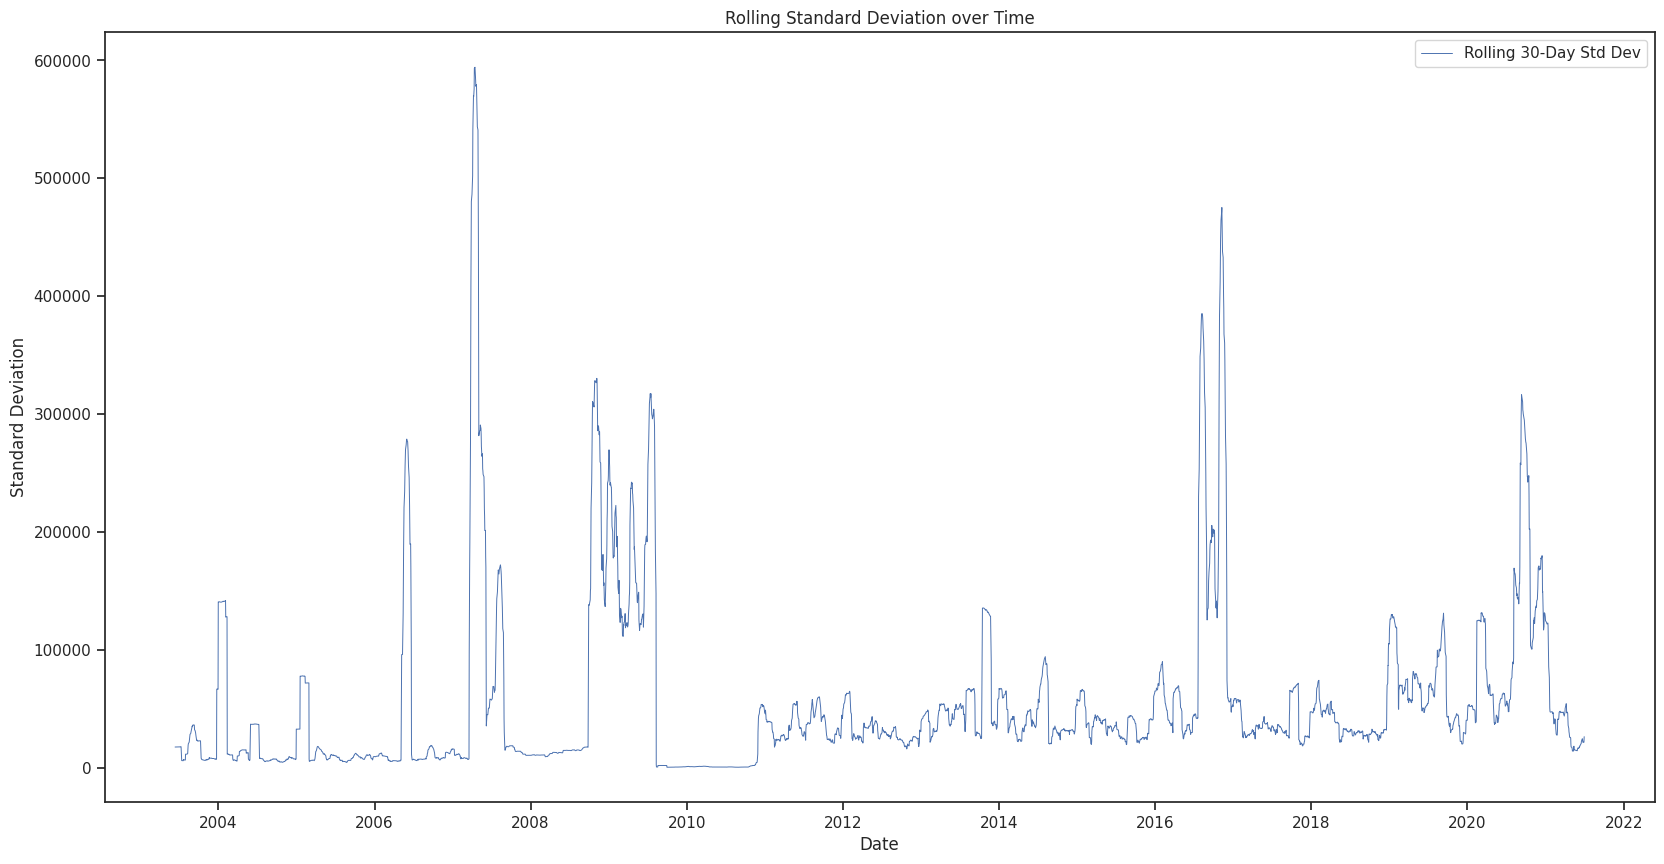

In [ ]:
window = 30
rolling_std = data['volume'].rolling(window=window).std()

plt.figure(figsize=(20, 10))
# Plot rolling standard deviation
plt.plot(data.index, rolling_std, label=f'Rolling {window}-Day Std Dev')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation over Time')
plt.legend()
plt.show()

**OUtliers and removal**

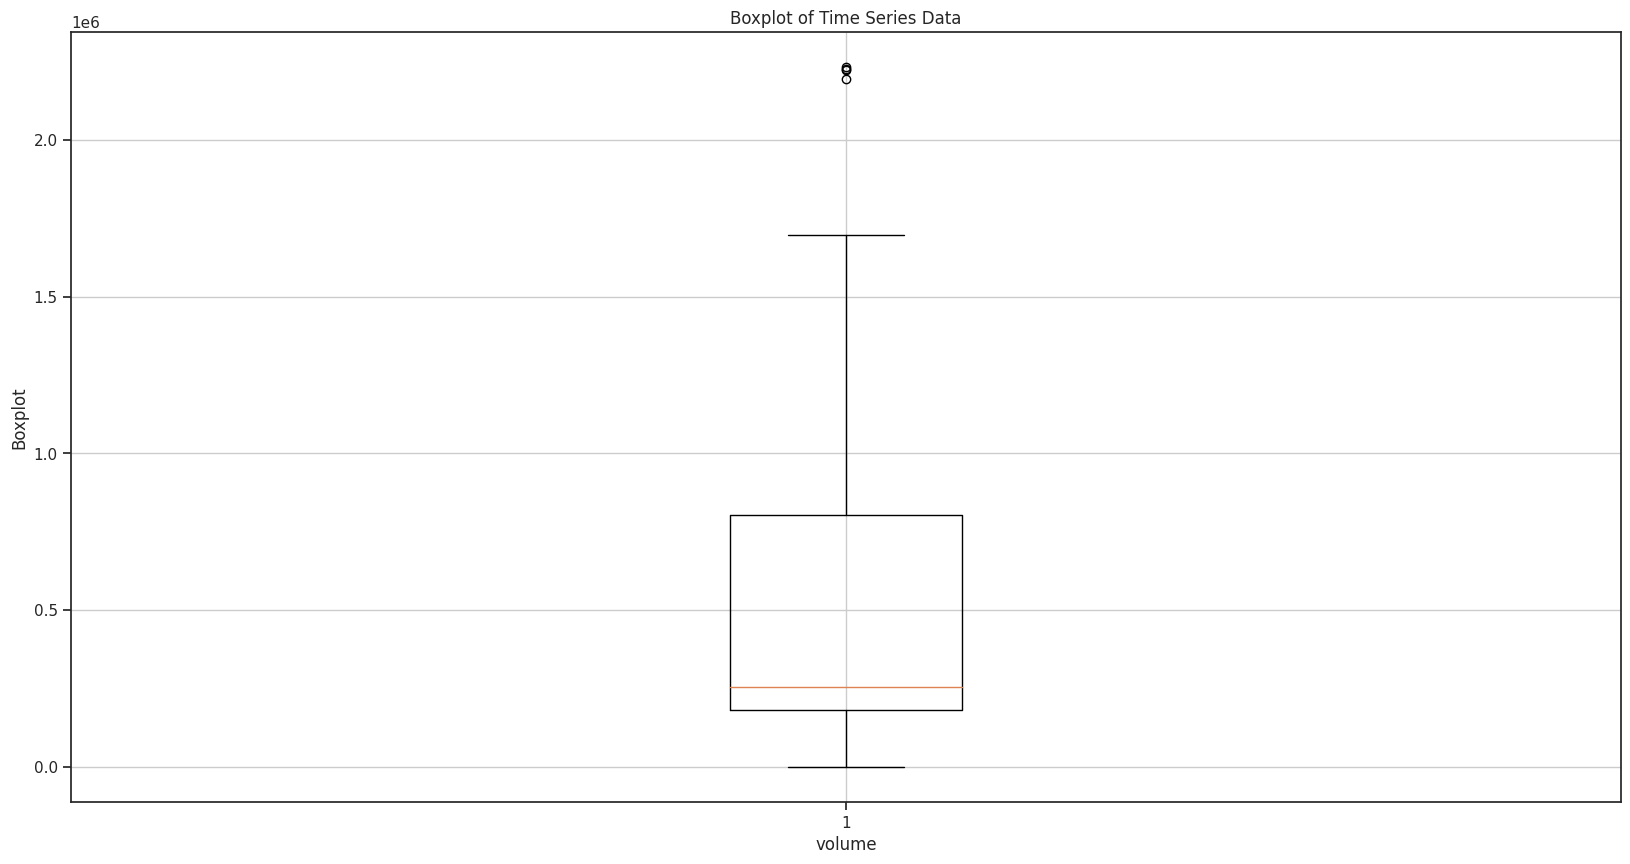

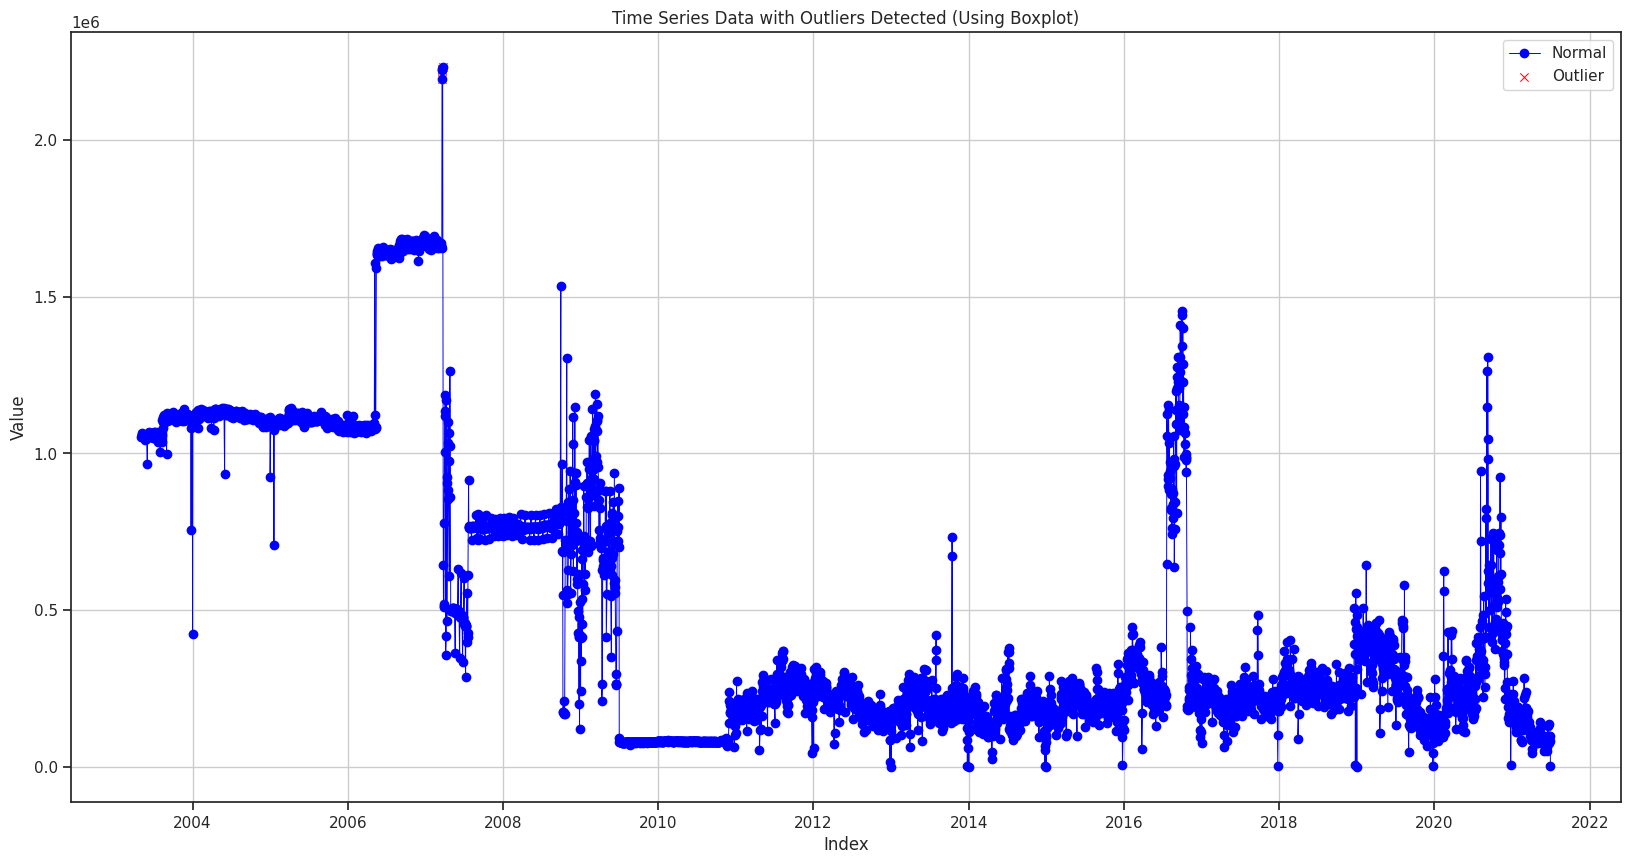

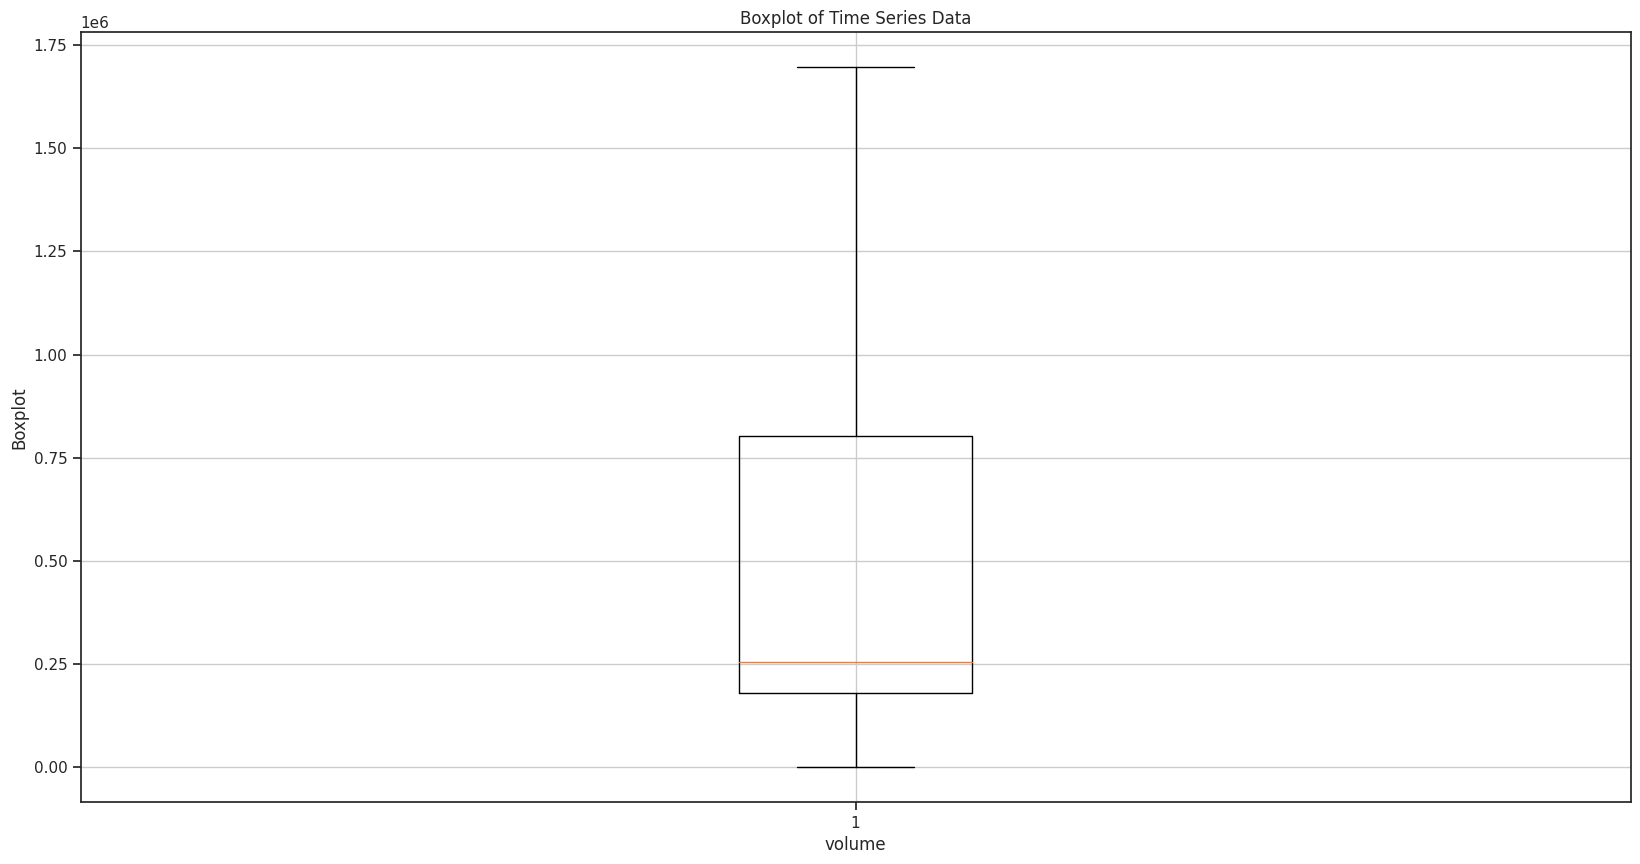

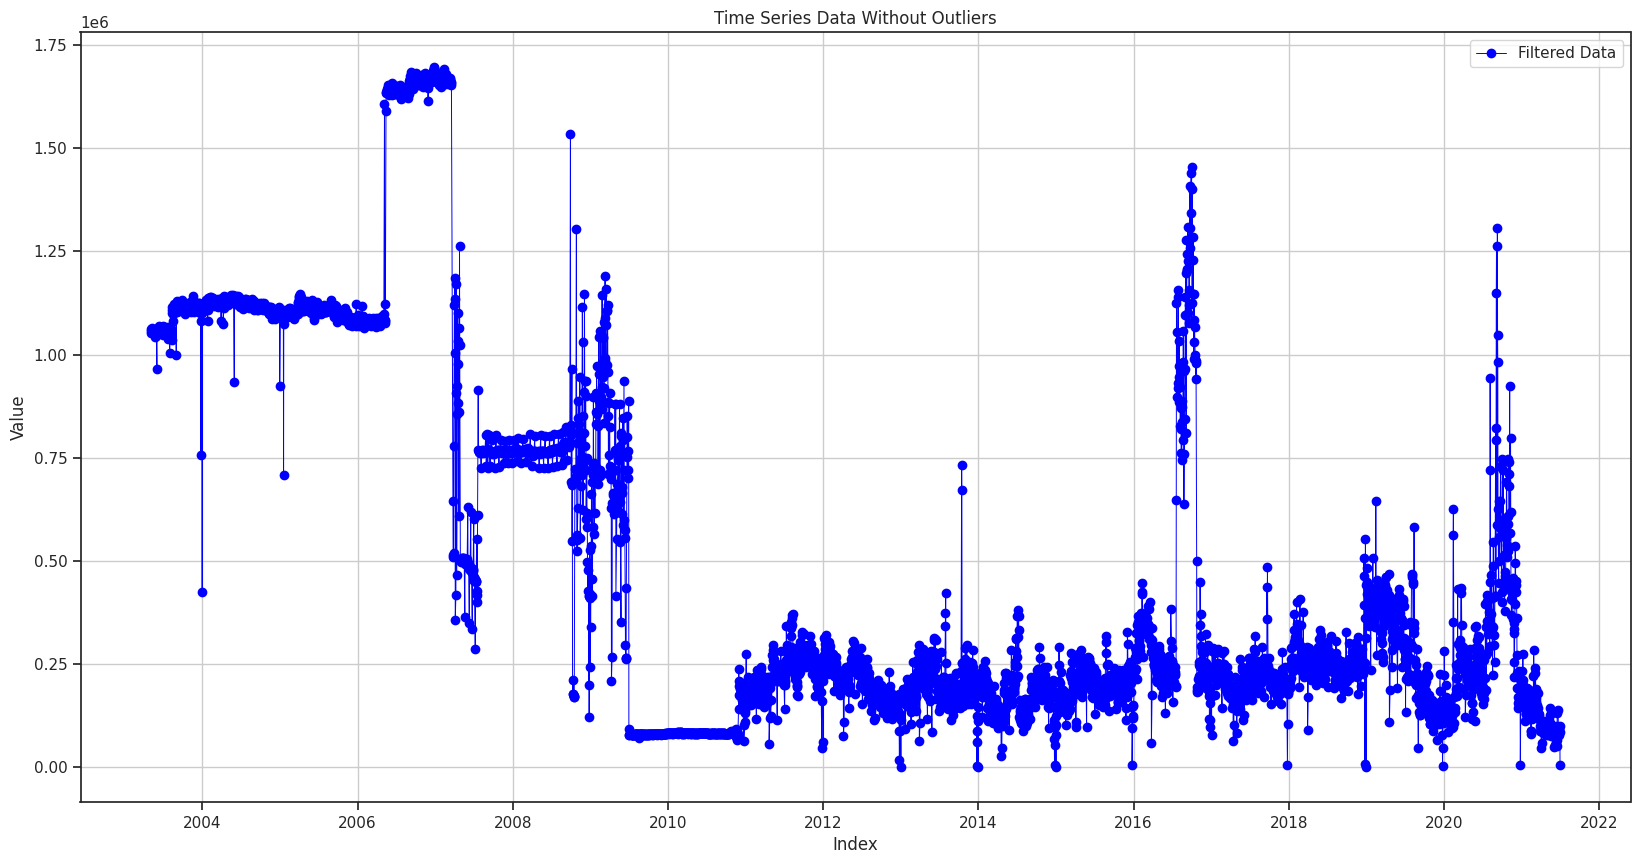

In [ ]:
plt.figure(figsize=(20, 10))
plt.boxplot(data['volume'])
plt.xlabel('volume')
plt.ylabel('Boxplot')
plt.title('Boxplot of Time Series Data')
plt.grid(True)
plt.show()

Q1 = data['volume'].quantile(0.25)
Q3 = data['volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['volume'] < lower_bound) | (data['volume'] > upper_bound)

plt.figure(figsize=(20, 10))
plt.plot(data.index, data['volume'], marker='o', linestyle='-', color='blue', label='Normal')
plt.scatter(data.index[outliers], data['volume'][outliers], marker='x', color='red', label='Outlier')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Data with Outliers Detected (Using Boxplot)')
plt.legend()
plt.grid(True)
plt.show()

filtered_data = data[~outliers]

plt.figure(figsize=(20, 10))
plt.boxplot(filtered_data['volume'])
plt.xlabel('volume')
plt.ylabel('Boxplot')
plt.title('Boxplot of Time Series Data')
plt.grid(True)
plt.show()

# Plot the filtered data without outliers
plt.figure(figsize=(20, 10))
plt.plot(filtered_data.index, filtered_data['volume'], marker='o', linestyle='-', color='blue', label='Filtered Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Data Without Outliers')
plt.legend()
plt.grid(True)
plt.show()

**Low filterpassing**

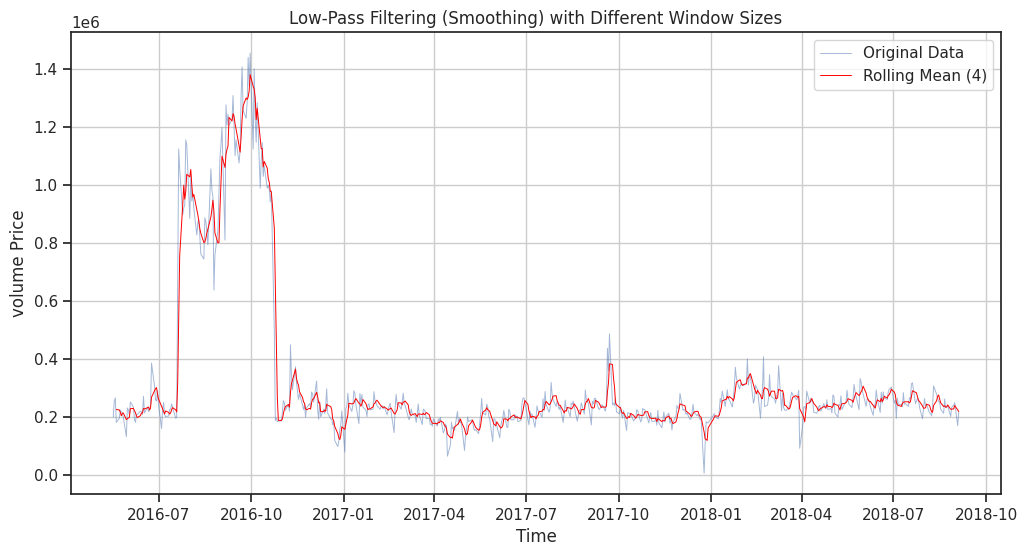

In [ ]:
data3 = data[3400:4000]
# Adjusted rolling window sizes
rolling_windows = [4]
colors = [ 'red']

# Plotting local means for different rolling window sizes
plt.figure(figsize=(12, 6))
# Use df.index instead of data.index for x-axis
plt.plot(data3.index, data3['volume'], label='Original Data',alpha=0.5) # Changed line

for i, window in enumerate(rolling_windows):
    rolling_mean = data3['volume'].rolling(window=window).mean()
    plt.plot(rolling_mean, label=f'Rolling Mean ({window})', color=colors[i])

plt.xlabel('Time')
plt.ylabel('volume Price')
plt.title('Low-Pass Filtering (Smoothing) with Different Window Sizes')
plt.legend()
plt.grid(True)
plt.show()

**Missing Values**

In [ ]:
missing_values = data.isnull()
missing_count = data.isnull().sum()
print(missing_values)
print(missing_count)

                           index   open   high    low  close  volume
Local time                                                          
2003-05-04 21:00:00+00:00  False  False  False  False  False   False
2003-05-05 21:00:00+00:00  False  False  False  False  False   False
2003-05-06 21:00:00+00:00  False  False  False  False  False   False
2003-05-07 21:00:00+00:00  False  False  False  False  False   False
2003-05-08 21:00:00+00:00  False  False  False  False  False   False
...                          ...    ...    ...    ...    ...     ...
2021-06-23 21:00:00+00:00  False  False  False  False  False   False
2021-06-24 21:00:00+00:00  False  False  False  False  False   False
2021-06-27 21:00:00+00:00  False  False  False  False  False   False
2021-06-28 21:00:00+00:00  False  False  False  False  False   False
2021-06-29 21:00:00+00:00  False  False  False  False  False   False

[4734 rows x 6 columns]
index     0
open      0
high      0
low       0
close     0
volume    0
dtype:

**Differencing between Mean AND seasonal component**

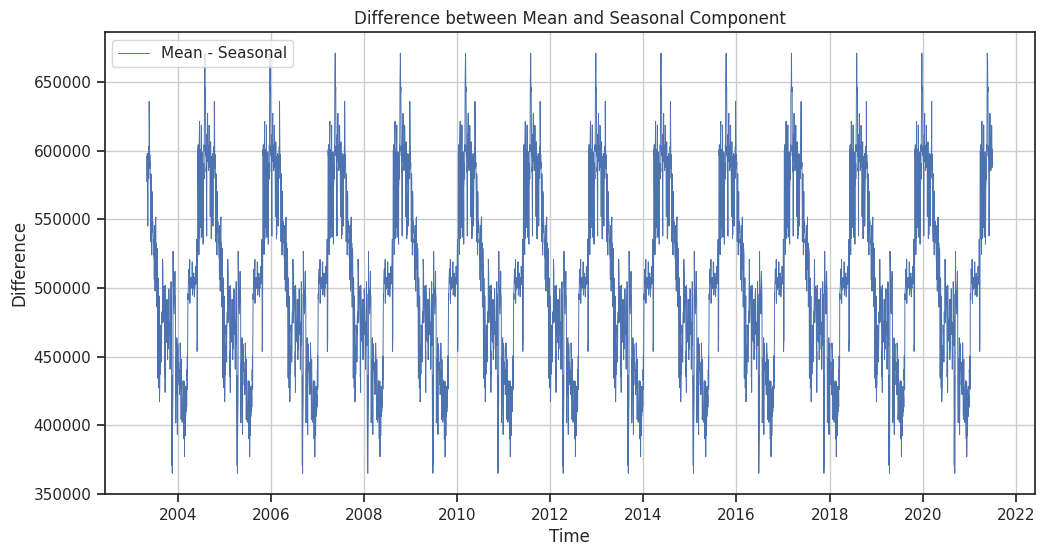

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(data['volume'], model='additive', period=365)

mean_value = data['volume'].mean()
difference = mean_value - result.seasonal

plt.figure(figsize=(12, 6))
plt.plot(difference, label='Mean - Seasonal')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Difference between Mean and Seasonal Component')
plt.legend()
plt.grid(True)
plt.show()

# **ARIMA and ETS model**

In [ ]:
data.head(10)

,Local time,open,high,low,close,volume
0,05.05.2003 00:00:00.000 GMT+0300,1.12354,1.13019,1.12030,1.12804,1053162.797
1,06.05.2003 00:00:00.000 GMT+0300,1.12798,1.14510,1.12738,1.14368,1061122.699
2,07.05.2003 00:00:00.000 GMT+0300,1.14367,1.14448,1.13275,1.13677,1056796.590
3,08.05.2003 00:00:00.000 GMT+0300,1.13675,1.15092,1.13026,1.15026,1058908.699
4,09.05.2003 00:00:00.000 GMT+0300,1.15002,1.15376,1.14362,1.14907,1063989.000
5,10.05.2003 00:00:00.000 GMT+0300,1.14907,1.14907,1.14907,1.14907,0.000
6,11.05.2003 00:00:00.000 GMT+0300,1.14907,1.14907,1.14907,1.14907,0.000
7,12.05.2003 00:00:00.000 GMT+0300,1.14958,1.16244,1.14946,1.15457,1056515.797
8,13.05.2003 00:00:00.000 GMT+0300,1.15427,1.15751,1.14630,1.15150,1057731.395
9,14.05.2003 00:00:00.000 GMT+0300,1.15190,1.15388,1.14681,1.14970,1053901.311


In [ ]:
# Ensure the 'Local time' column is in datetime format
data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True) # Specify the correct format

# Create separate 'date' and 'time' columns
data['date'] = data['Local time'].dt.date
data['time'] = data['Local time'].dt.time

# Optionally, drop the original 'local_time' column if it's no longer needed
data.drop(columns=['Local time'], inplace=True)


In [ ]:
data.head(1)

,open,high,low,close,volume,date,time
0,1.12354,1.13019,1.1203,1.12804,1053162.797,2003-05-04,21:00:00


In [ ]:
columns = data.columns.tolist()
reordered_columns = columns[-2:] + columns[:-2]
df=data[reordered_columns]

In [ ]:
df.head(1)

,date,time,open,high,low,close,volume
0,2003-05-04,21:00:00,1.12354,1.13019,1.1203,1.12804,1053162.797


In [ ]:
df=df[df['volume']!=0] #discard volume zero df points
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail(5)

,date,time,open,high,low,close,volume
4729,2021-06-23,21:00:00,1.19267,1.19565,1.19178,1.19322,85152.21000
4730,2021-06-24,21:00:00,1.19322,1.19754,1.19264,1.19392,77837.64500
4731,2021-06-27,21:00:00,1.19380,1.19447,1.19025,1.19260,85154.26000
4732,2021-06-28,21:00:00,1.19297,1.19334,1.18779,1.18973,98898.57000
4733,2021-06-29,21:00:00,1.18973,1.19092,1.18452,1.18589,4301.30191


In [ ]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [ ]:
print(df.dtypes)
print(df.head())
print(df.tail(3))
print(df.describe())

time       object
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object
                time     open     high      low    close       volume
date                                                                 
2003-05-04  21:00:00  1.12354  1.13019  1.12030  1.12804  1053162.797
2003-05-05  21:00:00  1.12798  1.14510  1.12738  1.14368  1061122.699
2003-05-06  21:00:00  1.14367  1.14448  1.13275  1.13677  1056796.590
2003-05-07  21:00:00  1.13675  1.15092  1.13026  1.15026  1058908.699
2003-05-08  21:00:00  1.15002  1.15376  1.14362  1.14907  1063989.000
                time     open     high      low    close       volume
date                                                                 
2021-06-27  21:00:00  1.19380  1.19447  1.19025  1.19260  85154.26000
2021-06-28  21:00:00  1.19297  1.19334  1.18779  1.18973  98898.57000
2021-06-29  21:00:00  1.18973  1.19092  1.18452  1.18589   4301.30191
              open         high       

In [ ]:
col = 'volume'

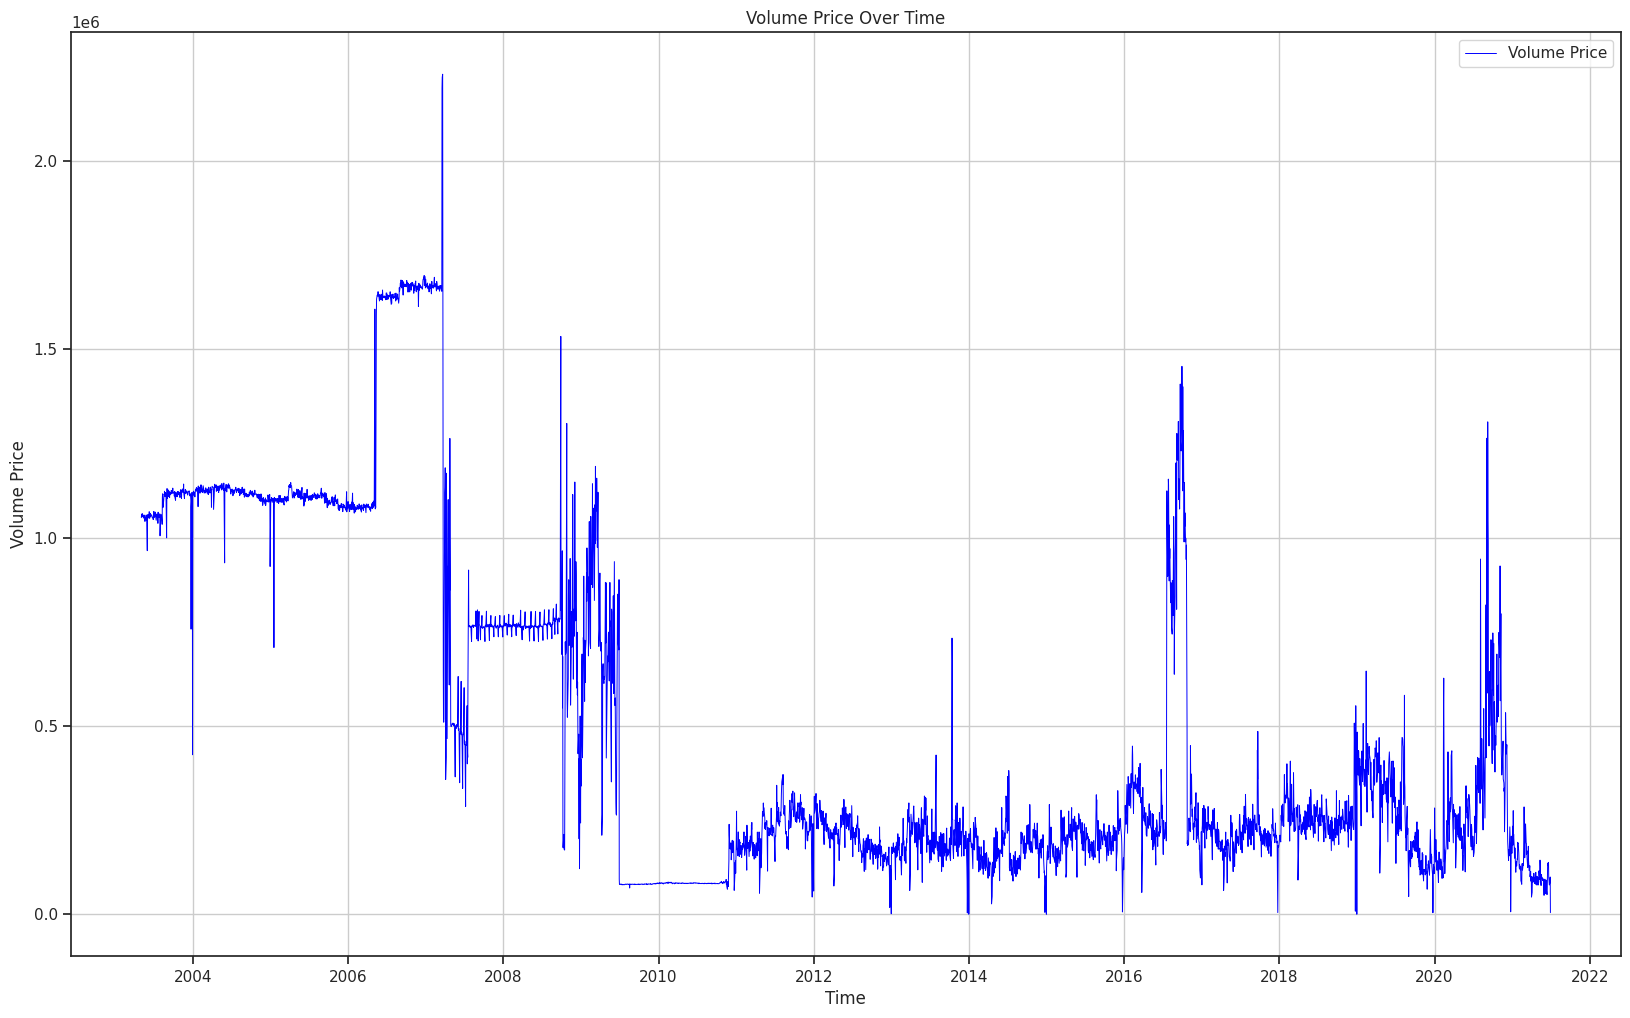

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(df.index, df['volume'], label='Volume Price', color='blue')

plt.title('Volume Price Over Time')
plt.xlabel('Time')
plt.ylabel('Volume Price')
plt.legend()
plt.grid(True)
plt.show()

**Cheking Stationarity using ADF test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts):
    # Perform Augmented Dickey-Fuller test
    dftest = adfuller(ts)

    # Extract test statistics
    adf = dftest[0]  # ADF statistic
    pvalue = dftest[1]  # p-value
    critical_value = dftest[4]['5%']  # 5% critical value

    # Determine stationarity
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')
check_stationarity(df[col])

The series is NOT stationary


**Removing Outliers**

In [ ]:
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['volume'] < lower_bound) | (df['volume'] > upper_bound)

df1 = df[~outliers]

**Definig function to plot seasonality and trend for  volume**

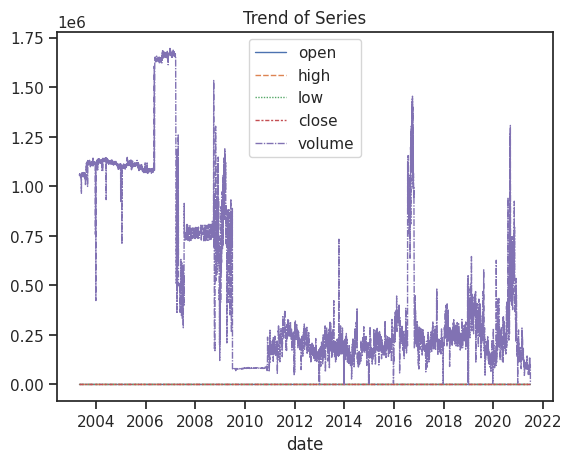

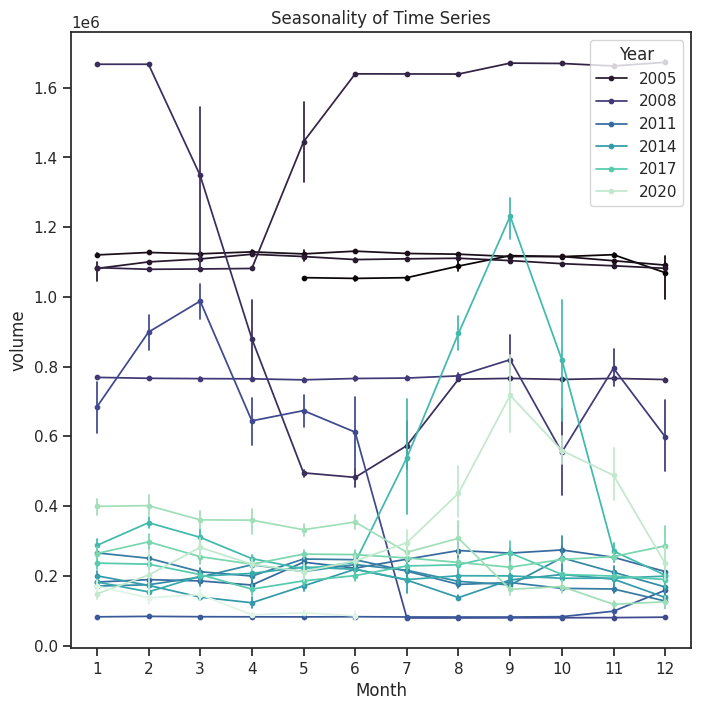

In [ ]:
def characteristics(data, x, y, title):
    # Plotting the main time series
    ax = sns.lineplot(data=data, lw=1)
    ax.lines[0].set_linestyle('solid')
    ax.set_title(title)

    # Creating a copy of the data for seasonal analysis
    df_temp = data.copy()
    df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
    df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

    # Plotting seasonality
    plt.figure(figsize=(8, 8))
    plt.title('Seasonality of Time Series')
    sns.set(style="ticks", rc={"lines.linewidth": 0.7})
    sns.pointplot(x='Month', y=y, hue='Year', data=df_temp, palette='mako', linestyles='-')
characteristics(df1, df1.index, 'volume', 'Trend of Series')

**ACF And PACF plot For stationarity**

<Figure size 1200x600 with 0 Axes>

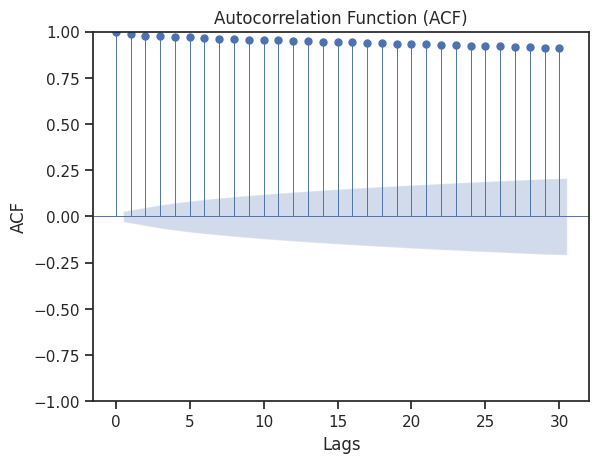

<Figure size 1200x600 with 0 Axes>

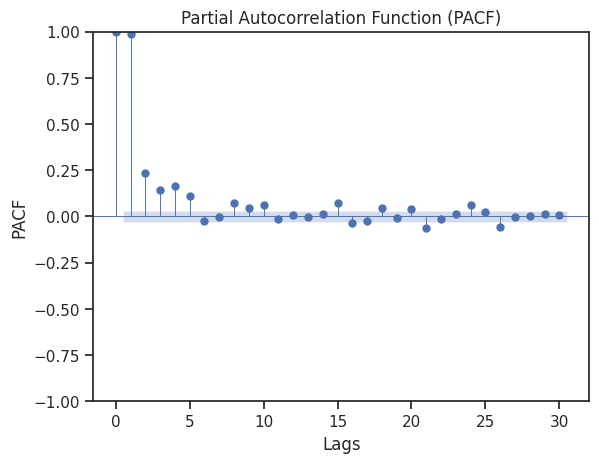

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(df1['volume'], lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df1['volume'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

**Check for Stationarity:**
A time series is said to be stationary if the mean, variance and autocorrelation does not vary
over time. Trend, seasonality and other characteristics varying according to time will affect
modelling as underlying pattern of the data is not learnt by the model due to non-stationarity.
Thus stationarity needs to be achieved.
The following are the methods for stationarity test:
Rolling Window Analysis
Dickey Fuller Test

**Rolling Window Analysis **
 It refers to calculating the values based on previous ‘window size’ of values. It analyses
if the variation is time dependent and if yes for what size of the window.
This helps use to know the nature of coefficients of the data with respect to time. Our
aim is to achieve parameter stability of the data.
 As we have found that the data is seasonal in the above graph, we set the window  
size = 12.

**Augmented Dickey Fuller Test **
On an explanatory perspective,
 Null hypothesis H0 implies that unit root=1, the time series is not stationary.
 Alternate hypothesis H1 implies that unit root <1, and the series is stationary.
We us test statistic value, critical values at 1%, 5% and 10% confidence intervals and p value
for evaluating the test results. When the test statistic < = critical values, p value < 0.05 indicates
that null hypothesis can be rejected and data is stationary.

<ipython-input-147-688b3892596b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r_mean'] = data[col_name].rolling(window=window).mean()
<ipython-input-147-688b3892596b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r_std'] = data[col_name].rolling(window=window).std()


Test Statistic                   -2.336578
p-value                           0.160442
Lags Used                        32.000000
Number of Observations Used    4697.000000
Critical Value (1%)              -3.431743
Critical Value (5%)              -2.862156
Critical Value (10%)             -2.567098
dtype: float64


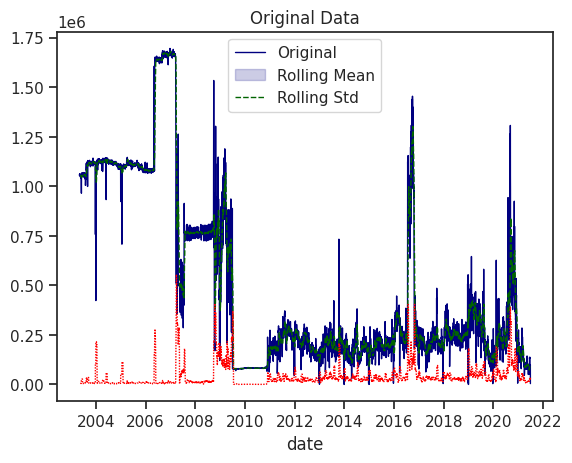

In [ ]:
def stationarity_test(df, window, title, col_name):
    # Perform rolling statistics
    roll_mean = df[col_name].rolling(window=window).mean()
    roll_std = df[col_name].rolling(window=window).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(df[col_name], color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[col_name], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Example usage (replace 'df' and 'close' with your actual DataFrame and column name)
stationarity_test(df1, window=12, title='Stationarity Test', col_name='volume')

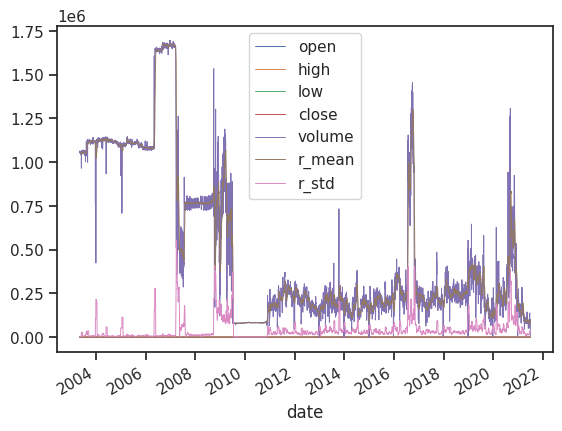

In [ ]:
df1.plot()
plt.show()

**Differencing**

Test Statistic                -1.294312e+01
p-value                        3.500751e-24
Lags Used                      3.100000e+01
Number of Observations Used    4.697000e+03
Critical Value (1%)           -3.431743e+00
Critical Value (5%)           -2.862156e+00
Critical Value (10%)          -2.567098e+00
dtype: float64


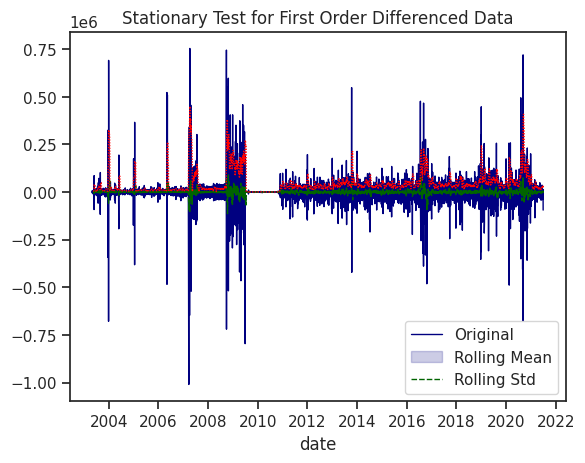

In [ ]:
def differencing(data, order, col_name): # Add col_name as a parameter
    # Perform differencing on the specified column
    df_diff = data[col_name].diff(periods=order)

    # Drop NaN values resulting from differencing
    df_diff.dropna(inplace=True)

    # Create a new DataFrame with the differenced values and original index
    df_diff = pd.DataFrame(df_diff, columns=[col_name], index=data.index[order:])

    return df_diff

# Specify the column to difference ('volume' in this case)
df_diff = differencing(df1, 1, 'volume')

# Perform stationarity test on differenced data, passing the DataFrame instead of the Series
stationarity_test(df_diff, window=12, title='Stationary Test for First Order Differenced Data', col_name='volume')

**ACF And Pacf plot for differenced data**

<Figure size 1200x600 with 0 Axes>

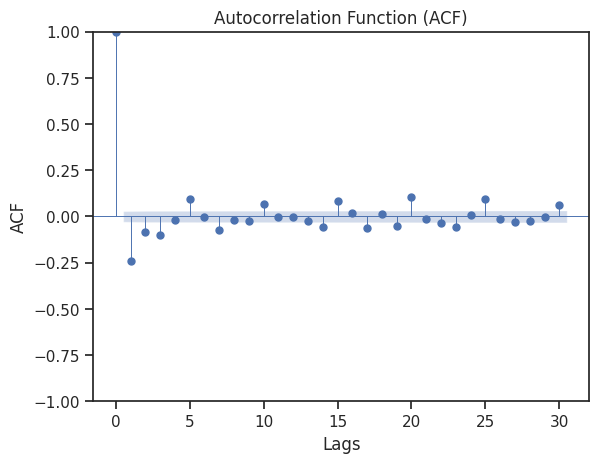

<Figure size 1200x600 with 0 Axes>

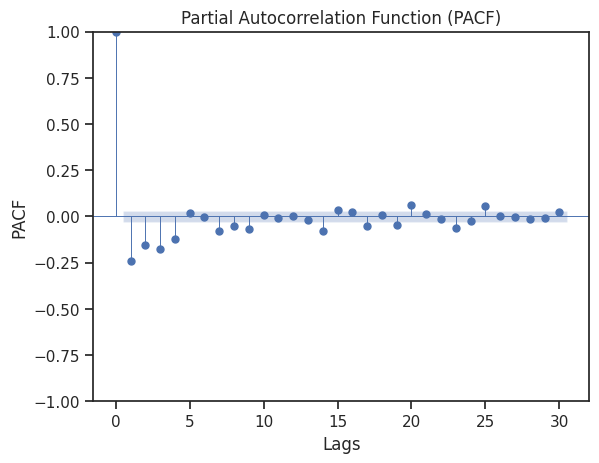

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
# Pass the 'volume' column of the df_diff DataFrame as the 'x' argument
plot_acf(df_diff['volume'], lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
# Pass the 'volume' column of the df_diff DataFrame as the 'x' argument
plot_pacf(df_diff['volume'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

**Applying Log transformation to original dataset df1**

Test Statistic                  -21.951677
p-value                           0.000000
Lags Used                        19.000000
Number of Observations Used    4709.000000
Critical Value (1%)              -3.431739
Critical Value (5%)              -2.862154
Critical Value (10%)             -2.567097
dtype: float64


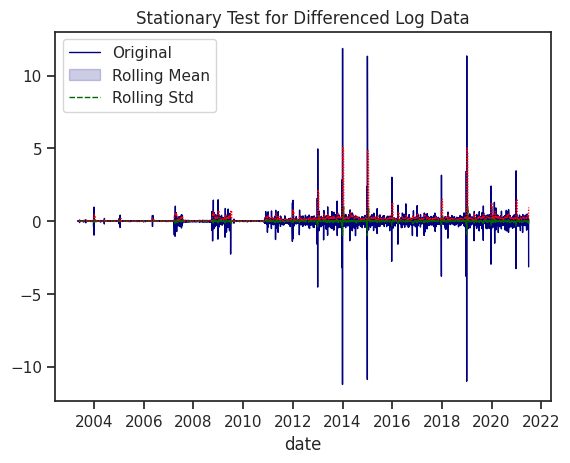

In [ ]:
# Apply the log transformation to the 'volume' column and create a new DataFrame
df_log = pd.DataFrame(np.log(df1['volume']), columns=['volume'], index=df1.index)

# Apply differencing to the log-transformed data
df_log_diff = differencing(df_log, 1, 'volume')

# Perform stationarity test on the differenced log-transformed data
stationarity_test(df_log_diff, window=12, title='Stationary Test for Differenced Log Data', col_name='volume')

**Acf And PACF for differenced log data**

<Figure size 1200x600 with 0 Axes>

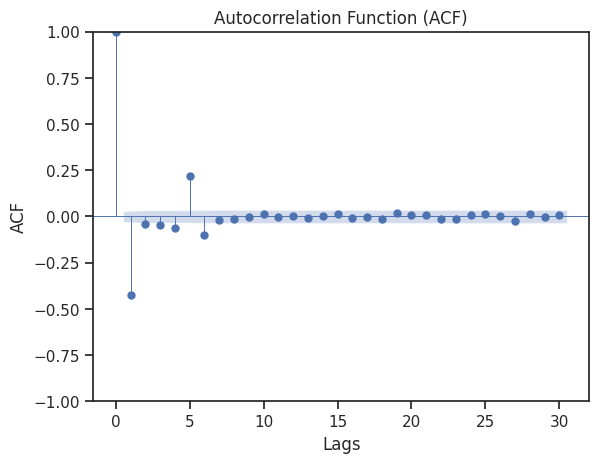

<Figure size 1200x600 with 0 Axes>

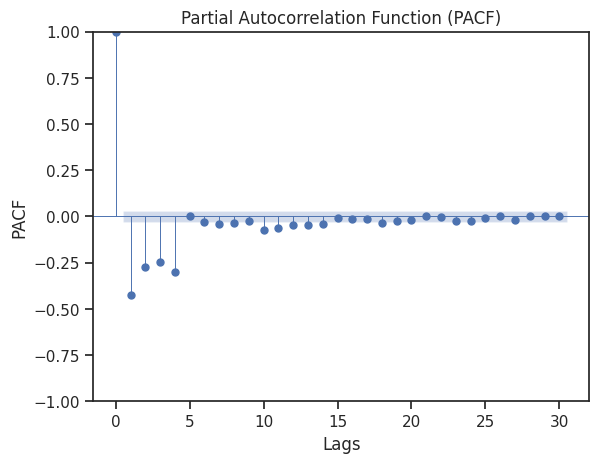

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 6))
# Pass the 'volume' column of the df_log_diff DataFrame as the 'x' argument
plot_acf(df_log_diff['volume'], lags=30, title='Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
# Pass the 'volume' column of the df_log_diff DataFrame as the 'x' argument
plot_pacf(df_log_diff['volume'], lags=30, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

# **SArimax Model**

In [ ]:
model_b = sm.tsa.statespace.SARIMAX(df_log, order=(4, 1, 3), seasonal_order=(3, 0, 6, 12))
results_b = model_b.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

# **ARIMA ANd ETS Model**

In [ ]:
print(df_diff.index)

DatetimeIndex(['2003-05-05', '2003-05-06', '2003-05-07', '2003-05-08',
               '2003-05-11', '2003-05-12', '2003-05-13', '2003-05-14',
               '2003-05-15', '2003-05-18',
               ...
               '2021-06-16', '2021-06-17', '2021-06-20', '2021-06-21',
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-27',
               '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', name='date', length=4729, freq=None)


**Test and training set**

In [ ]:
train, test = df_diff.iloc[:-12], df_diff.iloc[-12:]

In [ ]:
print(train.index)
print(test.index)

DatetimeIndex(['2003-05-05', '2003-05-06', '2003-05-07', '2003-05-08',
               '2003-05-11', '2003-05-12', '2003-05-13', '2003-05-14',
               '2003-05-15', '2003-05-18',
               ...
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-13'],
              dtype='datetime64[ns]', name='date', length=4717, freq=None)
DatetimeIndex(['2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-27', '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', name='date', freq=None)


# **ETS PLOT**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


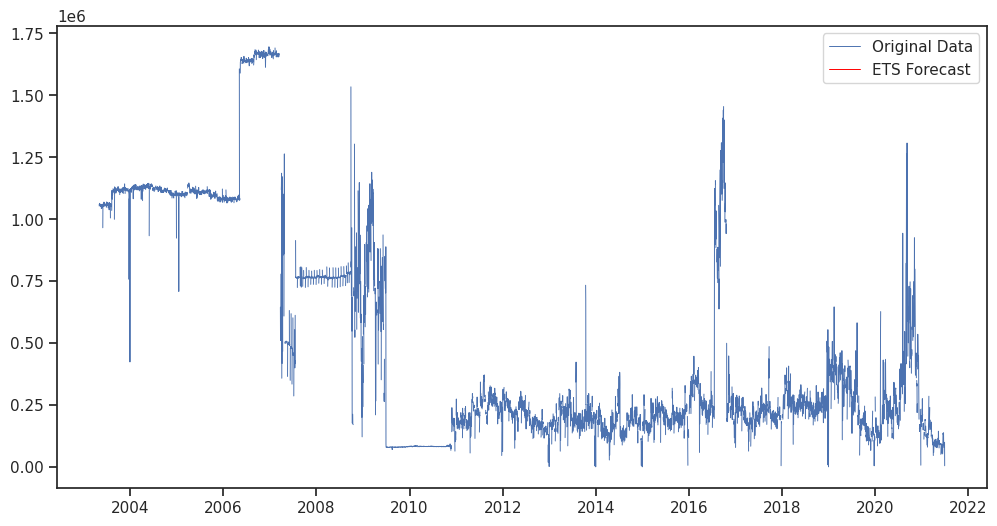

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# ETS Model
ets_model = ExponentialSmoothing(df1['volume'], trend='add').fit()
ets_forecast = ets_model.forecast(steps=300)
plt.figure(figsize=(12, 6))
plt.plot(df1['volume'], label='Original Data')
plt.plot(ets_forecast, label='ETS Forecast', color='red')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4729     4.030700e+03
4730     3.773094e+03
4731     3.528186e+03
4732     3.295657e+03
4733     3.075170e+03
            ...      
5724    8.596699e-255
5725    2.783681e-255
5726    9.004173e-256
5727    2.909409e-256
5728    9.390798e-257
Length: 1000, dtype: float64


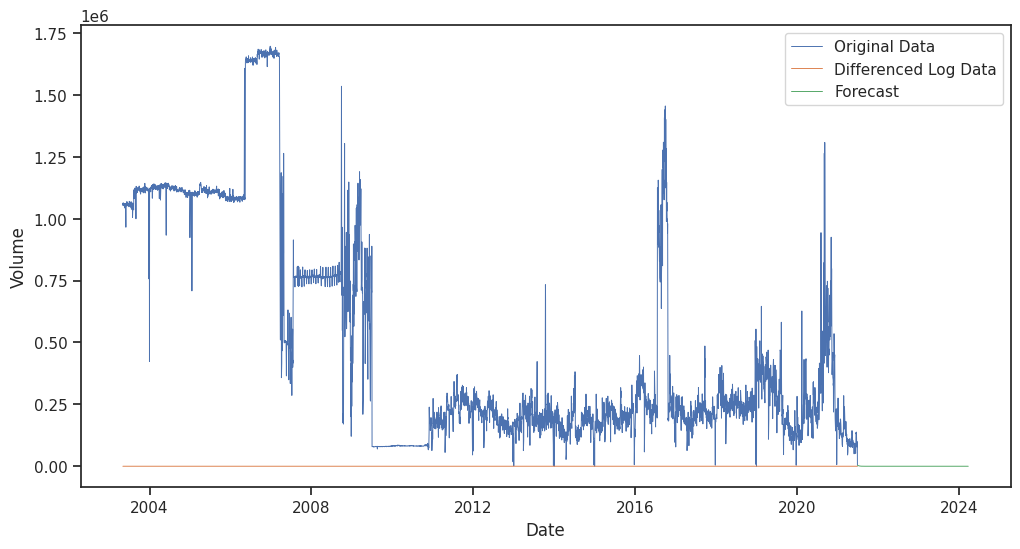

In [ ]:
#!pip install statsmodels
import statsmodels.api as sm

# Assuming df_log_diff is your DataFrame with differenced log-transformed data
# Fit Holt's Linear Trend model
model = sm.tsa.Holt(df_log_diff['volume']).fit()

# Forecast the next 10 time steps (adjust as needed)
forecast_steps = 1000
forecast = model.forecast(forecast_steps)

# Invert the differencing and log transformation to get forecasts in original scale
# (Assuming you did first-order differencing)
original_scale_forecast = np.exp(df_log['volume'].iloc[-1] + np.cumsum(forecast))

# Print the forecasts
print(original_scale_forecast)


# Plot the original data and the differenced log-transformed data
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['volume'], label='Original Data')
plt.plot(df_log_diff.index, df_log_diff['volume'], label='Differenced Log Data')

# Create the date range for the forecast
forecast_dates = pd.date_range(start=df_log_diff.index[-1], periods=forecast_steps + 1, freq=df_log_diff.index.freq)[1:]

# Plot the forecast, aligning it with the forecast dates
plt.plot(forecast_dates, original_scale_forecast, label='Forecast')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


4729     4.030700e+03
4730     3.773094e+03
4731     3.528186e+03
4732     3.295657e+03
4733     3.075170e+03
            ...      
5724    8.596699e-255
5725    2.783681e-255
5726    9.004173e-256
5727    2.909409e-256
5728    9.390798e-257
Length: 1000, dtype: float64


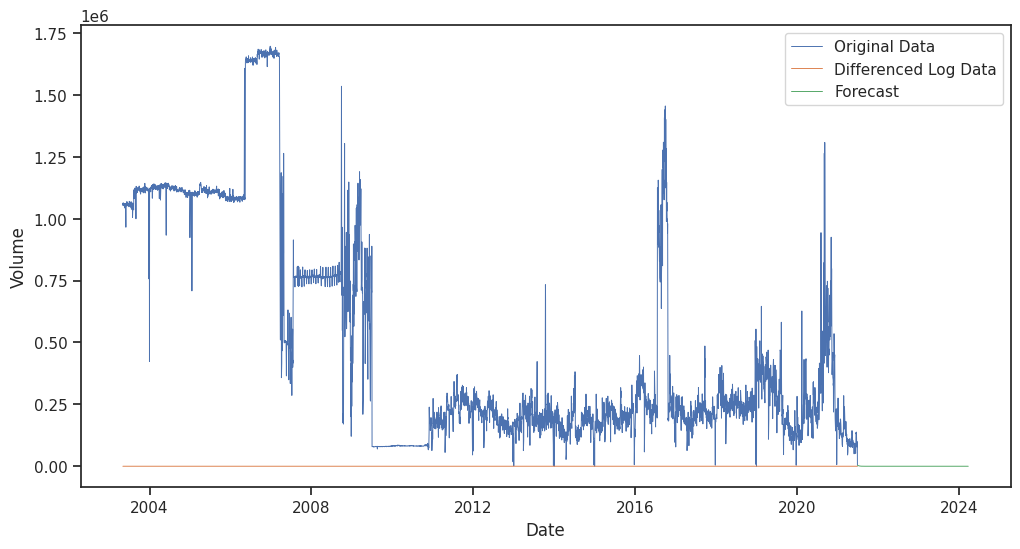

In [ ]:
#!pip install statsmodels --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Apply log transformation to 'volume' and create a new DataFrame
df_log = pd.DataFrame(np.log(df1['volume']), columns=['volume'], index=df1.index)

# Apply differencing to the log-transformed data
def differencing(data, order, col_name):
    df_diff = data[col_name].diff(periods=order)
    df_diff.dropna(inplace=True)
    df_diff = pd.DataFrame(df_diff, columns=[col_name], index=data.index[order:])
    return df_diff

df_log_diff = differencing(df_log, 1, 'volume')

# Fit Holt's Linear Trend model
# Removed smoothing_level and smoothing_slope parameters
model = sm.tsa.Holt(df_log_diff['volume']).fit()

# Forecast the next 10 time steps
forecast_steps = 1000
forecast = model.forecast(forecast_steps)

# Invert the differencing and log transformation to get forecasts in original scale
original_scale_forecast = np.exp(df_log['volume'].iloc[-1] + np.cumsum(forecast))

# Print the forecasts
print(original_scale_forecast)

# Plot the original data, the differenced log-transformed data, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['volume'], label='Original Data')
plt.plot(df_log_diff.index, df_log_diff['volume'], label='Differenced Log Data')

# Create the date range for the forecast
forecast_dates = pd.date_range(start=df_log_diff.index[-1], periods=forecast_steps + 1, freq=df_log_diff.index.freq)[1:]

# Plot the forecast, aligning it with the forecast dates
plt.plot(forecast_dates, original_scale_forecast, label='Forecast')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# **ARIMA Model**

In [ ]:
import pmdarima as pm

# Restart the kernel after installation (sometimes required)

auto_model = pm.auto_arima(df_diff['volume'], suppress_warnings=True)

# Fit the model
auto_model.fit(df_diff['volume'])

ARIMA(order=(4, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

**ARIMA(4,0,0)**

In [ ]:
model = ARIMA(df_diff[col], order=(4, 0, 0))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 4729
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -59418.776
Date:                Sat, 15 Jun 2024   AIC                         118849.552
Time:                        13:11:10   BIC                         118888.321
Sample:                             0   HQIC                        118863.178
                               - 4729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -221.7935    543.364     -0.408      0.683   -1286.767     843.180
ar.L1         -0.3258      0.004    -75.182      0.000      -0.334      -0.317
ar.L2         -0.2252      0.006    -40.691      0.0

**ARIMA(4,1,3)**

In [ ]:
model1 = ARIMA(df_diff[col], order=(4, 1, 3))
results1 = model1.fit()
print(results1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 4729
Model:                 ARIMA(4, 1, 3)   Log Likelihood              -59439.321
Date:                Sat, 15 Jun 2024   AIC                         118894.641
Time:                        13:11:28   BIC                         118946.331
Sample:                             0   HQIC                        118912.809
                               - 4729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7234      0.169     -4.280      0.000      -1.055      -0.392
ar.L2          0.1862      0.053      3.518      0.000       0.082       0.290
ar.L3         -0.1317      0.018     -7.324      0.0

**ARIMA(4,0,3)**

In [ ]:
model2 = ARIMA(df_diff[col], order=(4, 0,3 ))
results2 = model2.fit()
print(results2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                 4729
Model:                 ARIMA(4, 0, 3)   Log Likelihood              -59408.780
Date:                Sat, 15 Jun 2024   AIC                         118835.560
Time:                        13:11:50   BIC                         118893.714
Sample:                             0   HQIC                        118856.000
                               - 4729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -221.7935    472.268     -0.470      0.639   -1147.421     703.834
ar.L1          0.0958      0.077      1.252      0.210      -0.054       0.246
ar.L2         -0.5777      0.044    -13.206      0.0

**Preditction**

In [ ]:
data.index.freq = 'MS'

In [ ]:
train, test = df_diff.iloc[:-12], df_diff.iloc[-12:]

In [ ]:
print(train.index)
print(test.index)

DatetimeIndex(['2003-05-05', '2003-05-06', '2003-05-07', '2003-05-08',
               '2003-05-11', '2003-05-12', '2003-05-13', '2003-05-14',
               '2003-05-15', '2003-05-18',
               ...
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-13'],
              dtype='datetime64[ns]', name='date', length=4717, freq=None)
DatetimeIndex(['2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-27', '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
pred = results.predict(start=test.index[0], end=test.index[-1])
test['pred_b'] = pred.values

<ipython-input-161-96e717f2715e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_b'] = pred.values


**MSE, RSME, MAE**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['volume'], test['pred_b'])
print('mse:', mse)
rmse = np.sqrt(mean_squared_error(test['volume'], test['pred_b']))
print('rmse:', rmse)
mae = np.mean(np.abs(results.resid))
print('MAE: %.3f' % mae)

mse: 1156720226.1187317
rmse: 34010.589911360425
MAE: 31485.588


In [ ]:
pred1 = results1.predict(start=test.index[0], end=test.index[-1])
test['pred_b'] = pred1.values

<ipython-input-166-b66e7b1227ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_b'] = pred1.values


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['volume'], test['pred_b'])
print('mse:', mse)
rmse = np.sqrt(mean_squared_error(test['volume'], test['pred_b']))
print('rmse:', rmse)
mae = np.mean(np.abs(results1.resid))
print('MAE: %.3f' % mae)

mse: 1150800087.6493134
rmse: 33923.44451333492
MAE: 31628.240


In [ ]:
pred2 = results2.predict(start=test.index[0], end=test.index[-1])
test['pred_b'] = pred2.values

<ipython-input-168-866e3ef6000b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_b'] = pred2.values


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['volume'], test['pred_b'])
print('mse:', mse)
rmse = np.sqrt(mean_squared_error(test['volume'], test['pred_b']))
print('rmse:', rmse)
mae = np.mean(np.abs(results2.resid))
print('MAE: %.3f' % mae)

mse: 1142486057.3762903
rmse: 33800.68131526775
MAE: 31537.286


**Diagnostic checking for Model(4,0,0)**

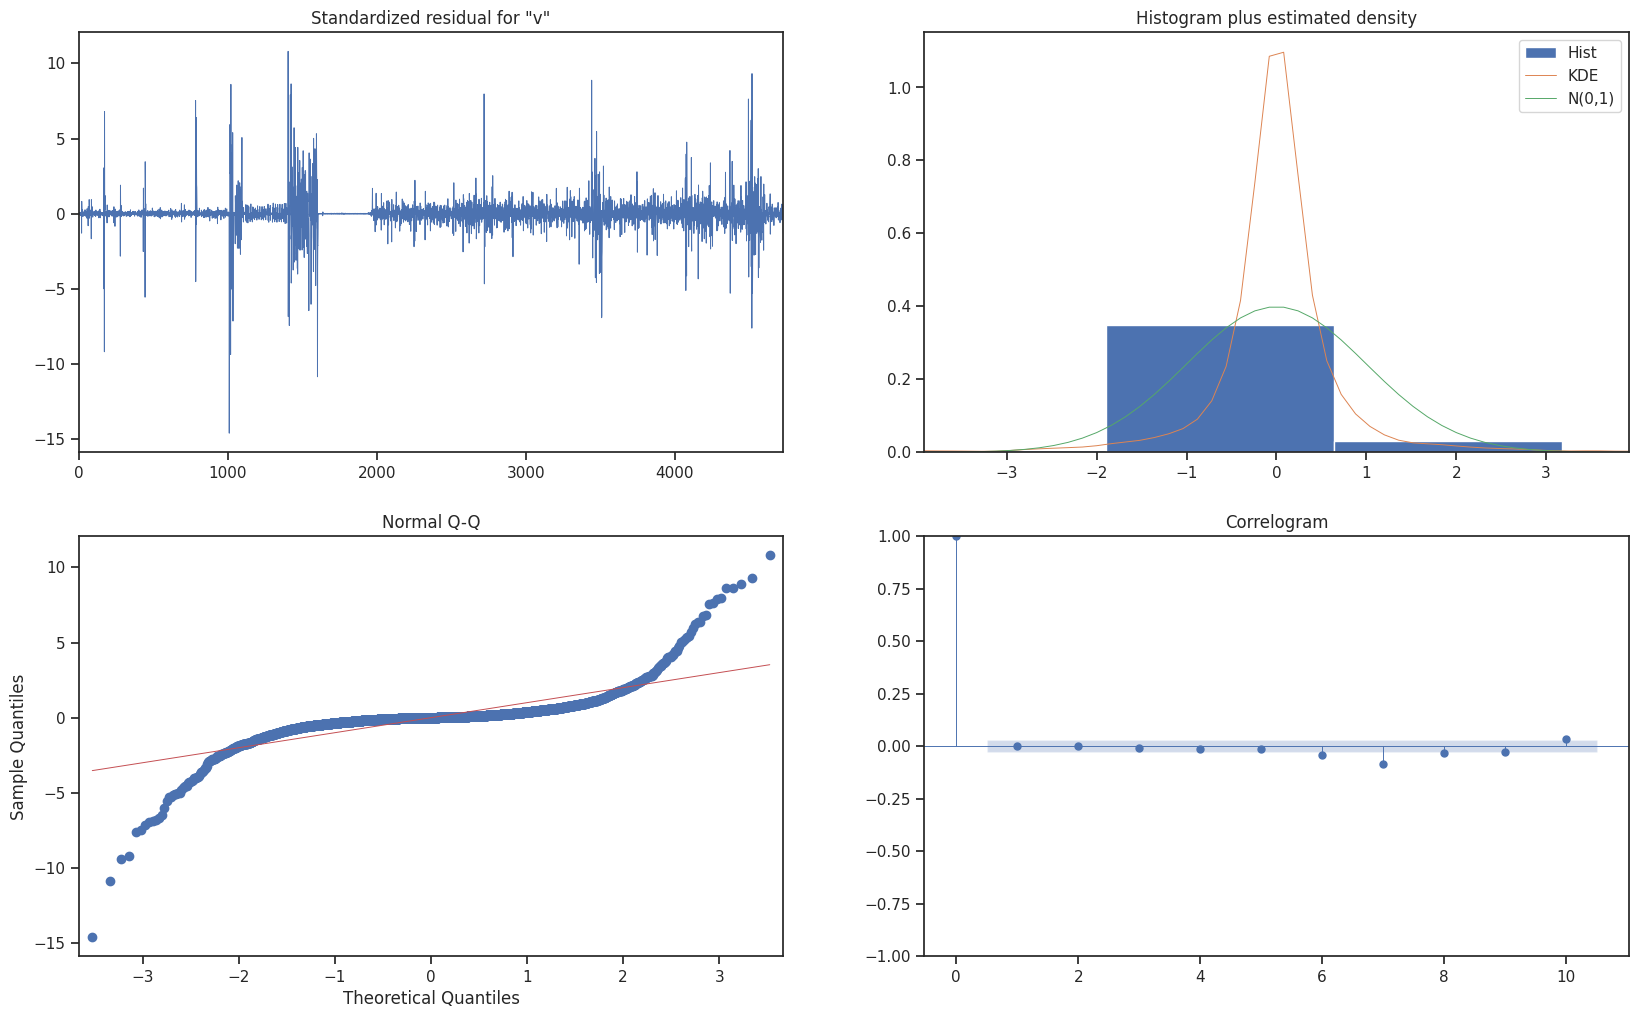

In [ ]:
results.plot_diagnostics(figsize=(20,12))
plt.show()

In [ ]:
print(df_diff)
print(df_diff.columns)

                 volume       r_mean         r_std
date                                              
2003-05-05   7959.90200          NaN           NaN
2003-05-06  -4326.10900          NaN           NaN
2003-05-07   2112.10900          NaN           NaN
2003-05-08   5080.30100          NaN           NaN
2003-05-11  -7473.20300          NaN           NaN
...                 ...          ...           ...
2021-06-23  -8555.80000  -399.362292  25640.559155
2021-06-24  -7314.56500  1636.540833  23831.468853
2021-06-27   7316.61500  -459.878333  21900.445313
2021-06-28  13744.31000  2665.914583  20926.925442
2021-06-29 -94597.26809 -3981.873466  34956.099022

[4729 rows x 3 columns]
Index(['volume', 'r_mean', 'r_std'], dtype='object')


In [ ]:
df_diff.reset_index(inplace=True)  # This will move 'date' from index to a regular column
df_diff = df_diff.set_index('date')  # Now you can set 'date' as the index


# **Forecasting**